In [1]:
import pandas as pd 

In [ ]:
df = pd.read_csv

We are given a dataset of patients going through cervical cancer, Cervical cancer although dangerous is alos the one which can be avoided if predicted early. The objective of this project is to take the dataset to see if we can make accurate predictions given a variety of features. 

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None)

In [26]:
df = pd.read_csv('Datasets/kag_risk_factors_cervical_cancer.csv')

In [8]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [10]:
x = df.drop('Biopsy', axis=1)
y = df['Biopsy']

In [11]:
x.shape

(858, 35)

In [12]:
y.shape

(858,)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=42)

Now that we have split the data into training and testing datasets we will start eda. 
Note: For EDA I'm using the df dataset which contains all the instances. We usually split the dataset early on before doing any operations is to avoid any bias which can affect the performance of our model. But in EDA we usually create visualizations to understand the 'spread' of the data better so that is why I'm using the complete data here

### EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [27]:
# the question marks here are basically nan values, which we don't know at all, so lets replace them with nan
df.replace({'?': np.nan}, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [29]:
# convert the object dtype to numerical one so that we can perform statistical analysis on them
df = df.apply(pd.to_numeric)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [31]:
# using stats to check the mean, mode, q1, and percentiles
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,741.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,858.000000,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,0.514804,0.104914,0.176627,0.058433,0.0,0.005312,0.057105,0.023904,0.001328,0.001328,0.001328,0.0,0.023904,0.001328,0.002656,0.087413,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,1.943089,0.306646,0.561993,0.234716,0.0,0.072739,0.232197,0.152853,0.036442,0.036442,0.036442,0.0,0.152853,0.036442,0.051503,0.302545,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data visualization 

Text(0.5, 1.0, 'Nan values in the df')

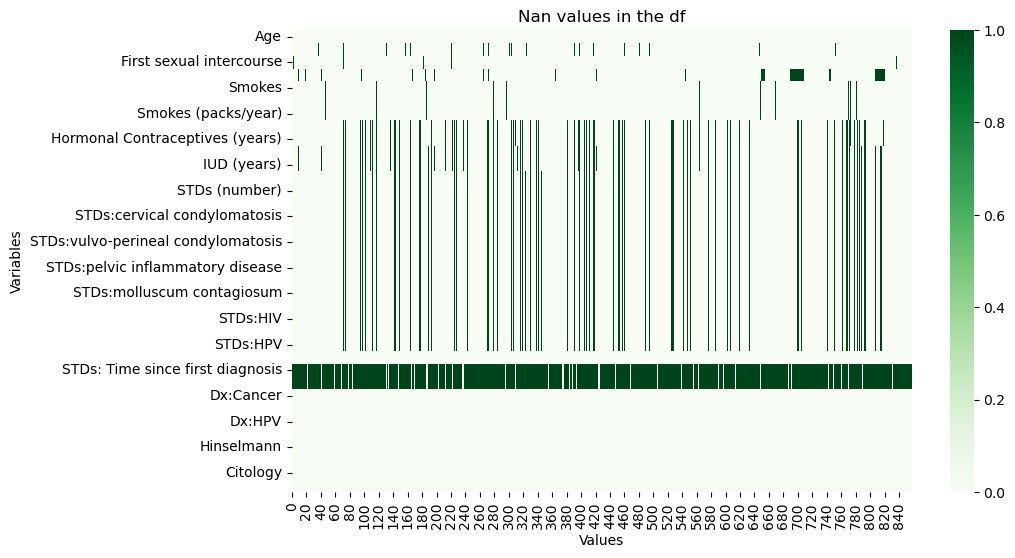

In [57]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().transpose(),
            cmap='Greens')
plt.xlabel('Values')
plt.ylabel("Variables")
plt.title('Nan values in the df')

In [61]:
# we have most of the nan values in the columns: 'STDs: Time since last diagnosis' and 'STDs: Time since first diagnosis'
# so lets drop them
df.drop(['STDs: Time since first diagnosis',
        'STDs: Time since last diagnosis'], inplace=True, axis=1)

Lets check the nan values again but this time lets use a displot

<Figure size 1000x600 with 0 Axes>

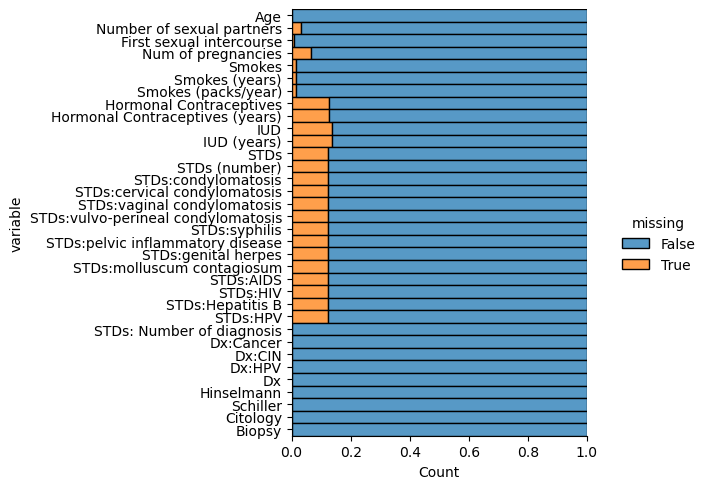

In [65]:
plt.figure(figsize=(10, 6))
sns.displot(df.isna().melt(value_name='missing'),
            y='variable',
            hue='missing',
            multiple='fill',
            aspect=1.25)

In [67]:
df.fillna(df.mean(), inplace=True)

In [68]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


Now that we have no null values lets, see a correlation matrix

In [70]:
corr_matrix = df.corr()
corr_matrix['Biopsy'].sort_values(ascending=False)

Biopsy                                1.000000
Schiller                              0.733204
Hinselmann                            0.547417
Citology                              0.327466
Dx:Cancer                             0.160905
Dx:HPV                                0.160905
Dx                                    0.157607
STDs:genital herpes                   0.129657
STDs:HIV                              0.124133
Dx:CIN                                0.113172
STDs                                  0.106737
STDs: Number of diagnosis             0.097449
STDs (number)                         0.096218
STDs:vulvo-perineal condylomatosis    0.086977
STDs:condylomatosis                   0.084520
Hormonal Contraceptives (years)       0.078995
Smokes (years)                        0.061484
Age                                   0.055956
IUD                                   0.051554
Num of pregnancies                    0.043460
IUD (years)                           0.032250
Smokes       

We can see that columns are barely related to our target column at all. I want to do an experiment here, lets make two copies of the dataest and then remove the column from one copy and keep the other copy as it is. We can then train them on the same model and see if we get something useful. 

<AxesSubplot:>

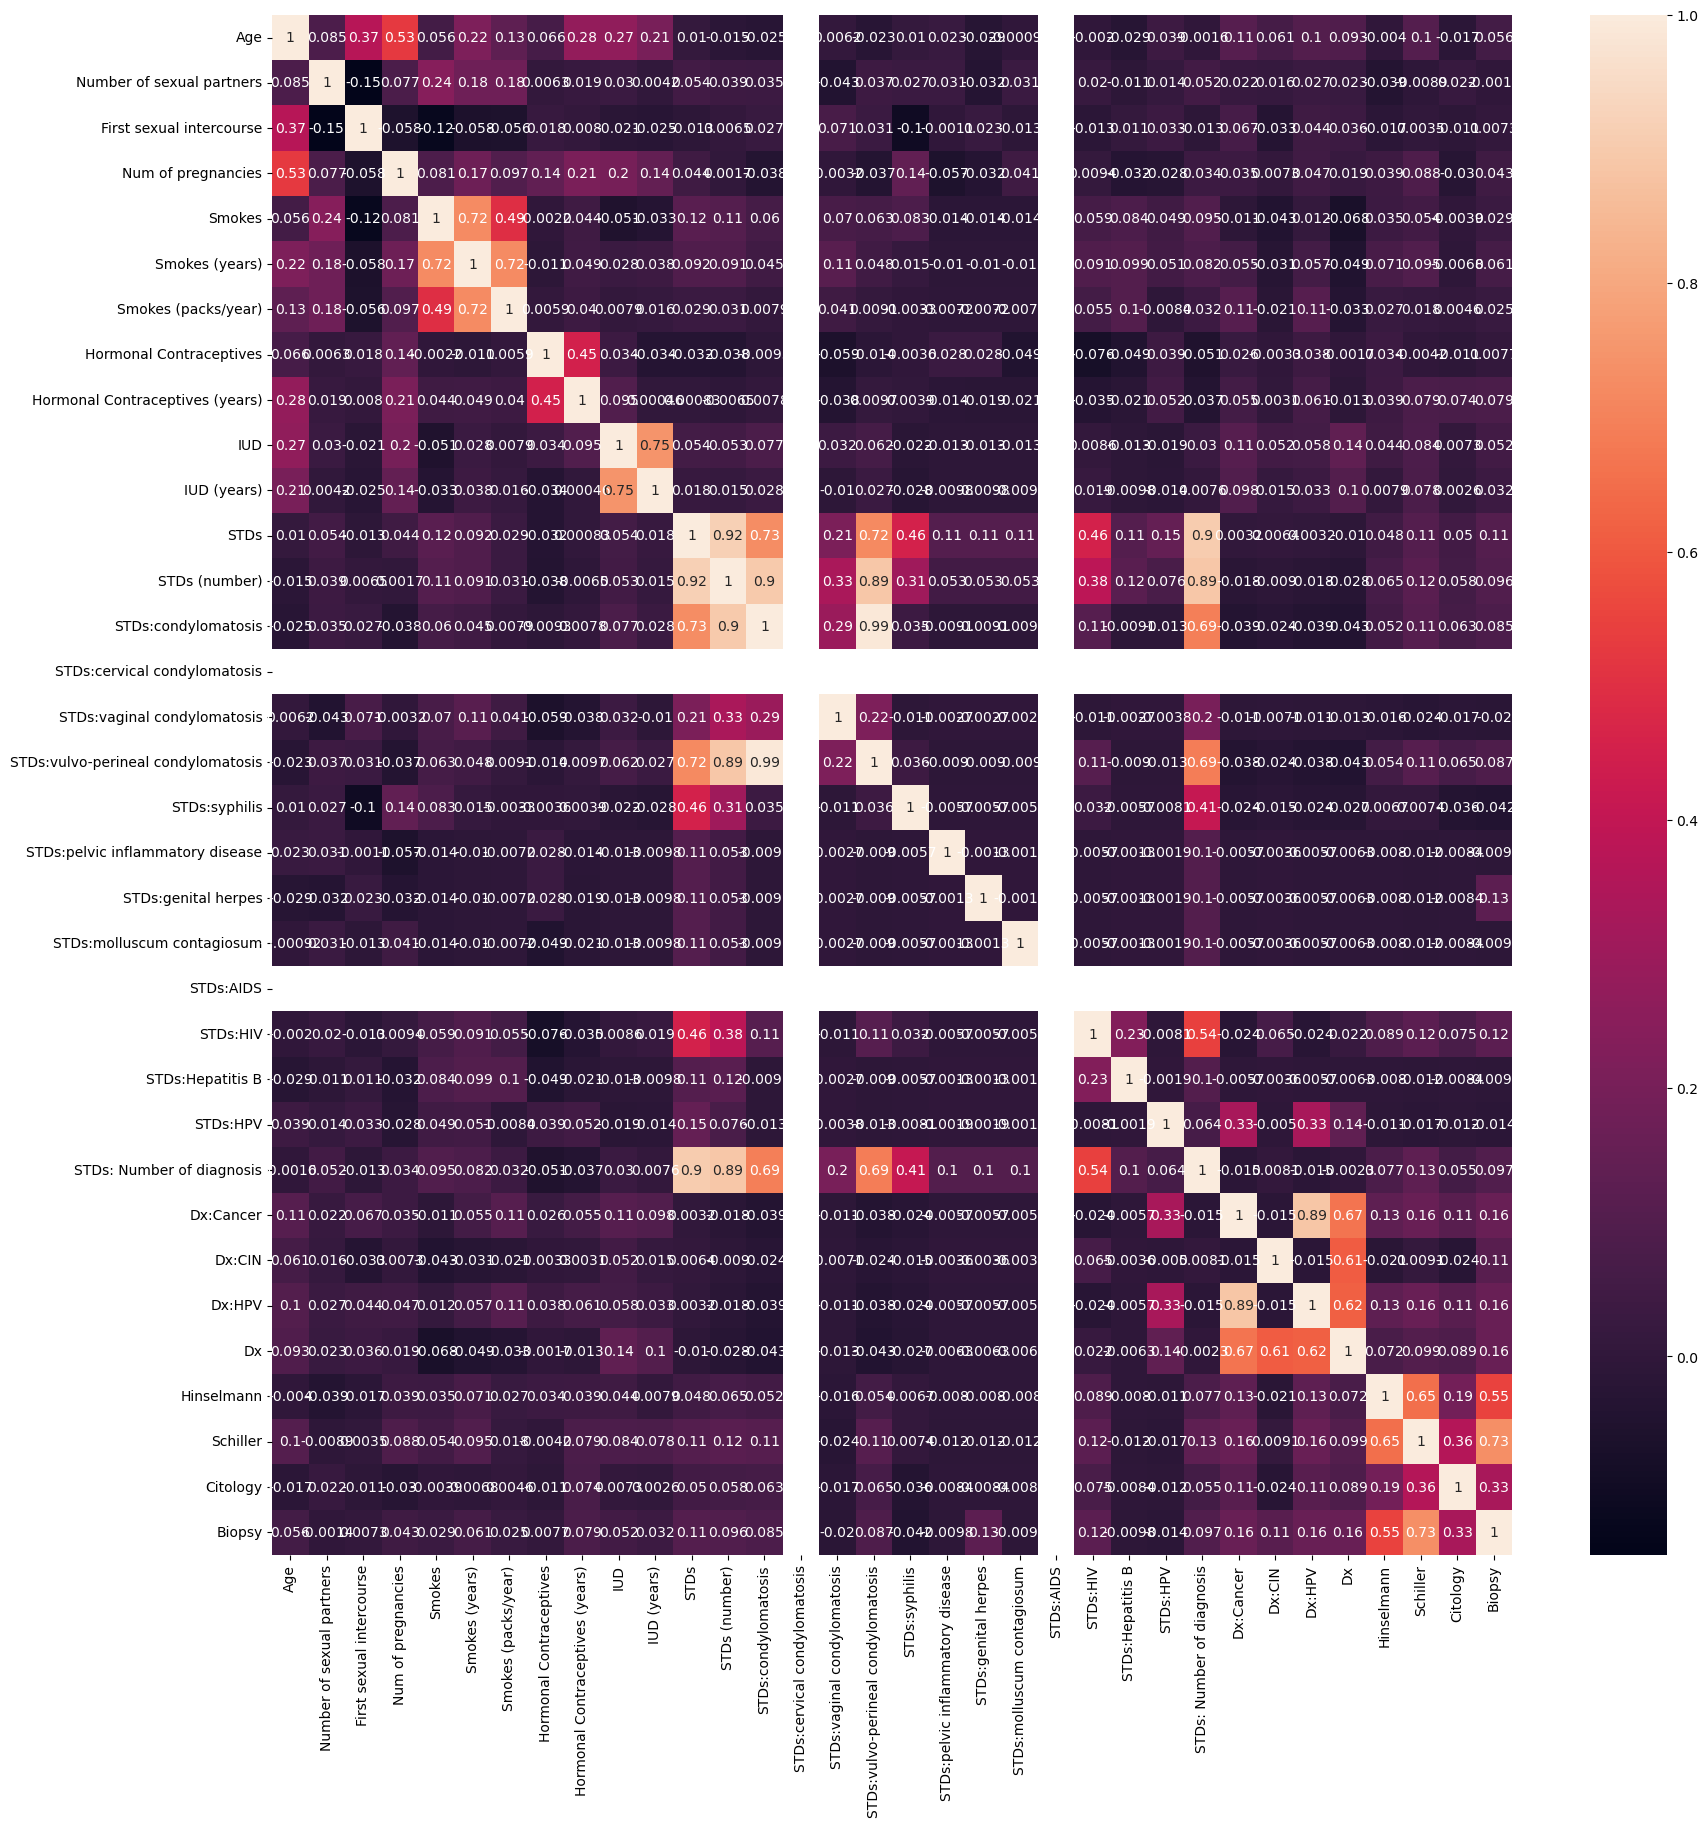

In [74]:
# using heatmap to see which are strongly correlated to the target
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True)

#### Conclusion
We can see that most of the features aren't really that correlated with biopsy, there is a good chance that they will affect model performance

### A little experiment
I wanted to check if dropping barely related columns would have any effect at all, so this section would make two copies of the data and then check if doing that would have any impact on the model at all

In [75]:
df1 = df.copy()
df2 = df.copy()

In [76]:
x1 = df1.drop('Biopsy', axis=1)
y1 = df1['Biopsy']

In [81]:
df3 = df2.drop(['STDs:AIDS', 'STDs:cervical condylomatosis', 'STDs:syphilis', 'STDs:vaginal condylomatosis',
                'STDs:HPV', 'STDs:molluscum contagiosum', 'STDs:pelvic inflammatory disease', 'STDs:Hepatitis B',
                'Number of sexual partners', 'First sexual intercourse', 'Hormonal Contraceptives', 'Smokes (packs/year)',
                'Smokes', 'IUD (years)', 'Num of pregnancies', 'IUD', 'Age', 'Smokes (years)', 'Hormonal Contraceptives (years)',
                'STDs:condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs (number)', 'STDs: Number of diagnosis'], axis=1)

In [83]:
x2 = df3.drop('Biopsy', axis=1)
y2 = df3['Biopsy']

In [104]:
log_clf_1 = LogisticRegression(solver='saga', penalty='l1', max_iter=5000)
log_clf_2 = LogisticRegression(solver='newton-cg')

In [88]:
log_clf_1.fit(x1, y1)

LogisticRegression(solver='newton-cg')

In [89]:
log_clf_2.fit(x2, y2)

LogisticRegression(solver='newton-cg')

In [97]:
score_1 = accuracy_score(y1, log_clf_1.predict(x1))

In [98]:
score_2 = accuracy_score(y2, log_clf_2.predict(x2))

In [99]:
print(f'accuracy score without dropping the columns is: {score_1}')
print(f'accuracy score with dropping the columns is: {score_2}')

accuracy score without dropping the columns is: 0.9662004662004662
accuracy score with dropping the columns is: 0.9638694638694638


In [105]:
log_clf_1.fit(x1, y1)

LogisticRegression(max_iter=5000, penalty='l1', solver='saga')

In [106]:
score_3 = accuracy_score(y1, log_clf_1.predict(x1))
print(f'accuracy score when using l1 regularization: {score_3}')

accuracy score when using l1 regularization: 0.9592074592074592


#### Conclusion
There isn't much difference in both, there is slight increase in the first case, of almost about 0.003. Which isnt really that much. Both of the classifiers used l2 regularization which reduces the weights of features which aren't needed at all. If we use l1 regulariztion the 

### Model training 
There are a couple of models we will be training and using gridsearchcv. Since this is a binary classification problem I will use Logisitic regression. 
I will also use ensemble techniqe: Random forests 
And maybe naive bayes, because most of the features are very weakly correlated. Naive bayes works on the assumptions that the features are independent of each other. 


We will also be using gridsearchcv on all the models

#### Logisitic regression model

In [111]:
# first we will split the data into training and testing, because we made some transformation to the data we will have to split
# it again
x = df.drop('Biopsy', axis=1)
y = df['Biopsy']

In [112]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=42)

In [120]:
log_clf_final = LogisticRegression(solver='newton-cg')

In [121]:
log_clf_final.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [122]:
y_pred = log_clf_final.predict(x_test)

In [123]:
log_score = accuracy_score(y_test, y_pred)
print(f'accuracy score of logistic model on test data is: {log_score}')

accuracy score of logistic model on test data is: 0.9883720930232558


##### Gridsearch cv on logistic regression model 

In [124]:
grid_params = {
    'solver': ['newton-cg', 'saga', 'sg'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': list(range(1, 100)),
    'max_iter': [100, 500, 1000, 2000, 3000, 5000]
}

In [125]:
best_log = GridSearchCV(log_clf_final, grid_params, cv=3, verbose=2, scoring='accuracy')

In [127]:
best_log.fit(x_train, y_train)

Fitting 3 folds for each of 5346 candidates, totalling 16038 fits
[CV] END ....C=1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...........C=1, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=1, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=1, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=1, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=1, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=1, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=1, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=1,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ...........C=1, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=1, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=1, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ...........C=1, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=1, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=1, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=1, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=1, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=1, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=1, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=1,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END ..........C=1, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=1, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=1, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END ..........C=1, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=1, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=1, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=1, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=1, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=1, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=1, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END ........C=1, max_iter=2000, penalty=l1, solver=saga; total time=   1.1s
[CV] END ........C=1, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s
[CV] END ..........C=1, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=1, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=1, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=1, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=1, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=1, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END ........C=1, max_iter=2000, penalty=l2, solver=saga; total time=   1.1s
[CV] END ........C=1, max_iter=2000, penalty=l2, solver=saga; total time=   1.2s
[CV] END ..........C=1, max_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=2, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=2, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...........C=2, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=2, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=2, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ....C=2, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=2, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=2, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=2, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=2, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=2, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=2, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=2, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=2, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=2, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=2, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=2, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=2, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=2, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=2, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=2,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=2, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=2, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=2, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ...........C=2, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=2, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=2, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ....C=2, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=2, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=2, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=2, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=2, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=2, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ...........C=2, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=2, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=2, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=2, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=2, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=2, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=2, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=2, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=2, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=2, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=2, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=2,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=2, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=2, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=2, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END ..........C=2, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=2, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=2, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=2, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=2, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=2, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=2, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=2, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=2, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END ..........C=2, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=2, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=2, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=2, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=2, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=2, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=2, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=2, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=2, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=2, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=2, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=2, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END ........C=2, max_iter=2000, penalty=l1, solver=saga; total time=   1.4s
[CV] END ........C=2, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s
[CV] END ..........C=2, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=2, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=2, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=2, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=2, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=2, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=2, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END ........C=2, max_iter=2000, penalty=l2, solver=saga; total time=   1.1s
[CV] END ........C=2, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s
[CV] END ..........C=2, max_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=3, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=3, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...........C=3, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=3, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=3, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=3, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=3, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=3, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .........C=3, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=3, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=3, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=3, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=3, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=3, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=3, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=3, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=3, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=3, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=3, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=3, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=3,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=3, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=3, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=3, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ...........C=3, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=3, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=3, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ....C=3, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=3, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=3, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=3, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=3, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=3, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ...........C=3, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=3, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=3, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=3, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=3, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=3, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=3, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=3, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=3, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=3,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=3, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=3, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=3, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END ..........C=3, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=3, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=3, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=3, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=3, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=3, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=3, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=3, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END ..........C=3, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=3, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=3, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=3, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=3, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=3, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=3, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=3, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=3, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s
[CV] END ........C=3, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s
[CV] END ........C=3, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END ..........C=3, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=3, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=3, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=3, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=3, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=3, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END ........C=3, max_iter=2000, penalty=l2, solver=saga; total time=   1.2s
[CV] END ........C=3, max_iter=2000, penalty=l2, solver=saga; total time=   1.1s
[CV] END ..........C=3, max_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=4, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...........C=4, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=4, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=4, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ....C=4, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=4, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=4, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .........C=4, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=4, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=4, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=4, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=4, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=4, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=4, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=4, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=4, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=4, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=4, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=4, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=4,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=4, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=4, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=4, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ...........C=4, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=4, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=4, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ....C=4, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=4, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=4, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=4, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=4, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=4, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ...........C=4, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=4, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=4, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=4, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=4, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=4, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=4, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=4, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=4, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=4,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=4, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=4, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=4, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END ..........C=4, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=4, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=4, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=4, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=4, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=4, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=4, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=4, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=4, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END ..........C=4, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=4, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=4, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=4, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=4, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=4, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=4, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=4, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=4, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END ........C=4, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END ........C=4, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END ..........C=4, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=4, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=4, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=4, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=4, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=4, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=4, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END ........C=4, max_iter=2000, penalty=l2, solver=saga; total time=   1.1s
[CV] END ........C=4, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END ..........C=4, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=4, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=4, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=4, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=4, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=4, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=5, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=5, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...........C=5, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=5, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=5, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ....C=5, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=5, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=5, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .........C=5, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=5, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=5, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=5, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=5, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=5, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=5, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=5, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=5, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=5, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=5, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=5,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=5, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=5, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=5, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ...........C=5, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=5, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=5, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ....C=5, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=5, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=5, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=5, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=5, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END ...........C=5, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=5, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=5, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=5, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=5, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=5, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=5, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=5, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=5, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=5,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=5, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=5, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=5, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s
[CV] END ..........C=5, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=5, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=5, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=5, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=5, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=5, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=5, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=5, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=5, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END ..........C=5, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=5, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=5, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=5, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=5, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=5, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=5, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=5, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=5, max_iter=2000, penalty=l1, solver=saga; total time=   1.3s
[CV] END ........C=5, max_iter=2000, penalty=l1, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=5, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END ..........C=5, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=5, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=5, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=5, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=5, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END ........C=5, max_iter=2000, penalty=l2, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=5, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s
[CV] END ..........C=5, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=5, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=5, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=5, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=5, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=5, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=5, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=5, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=6, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=6, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...........C=6, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=6, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=6, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=6, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=6, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=6, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .........C=6, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=6, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=6, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=6, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=6, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=6, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=6, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=6, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=6, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=6, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=6, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=6, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=6, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=6, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=6,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=6, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=6, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=6, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ...........C=6, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=6, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=6, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ....C=6, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=6, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=6, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=6, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=6, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=6, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ...........C=6, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=6, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=6, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=6, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=6, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=6, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=6, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=6, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=6, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=6, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=6, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=6,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=6, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=6, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=6, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s
[CV] END ..........C=6, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=6, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=6, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=6, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=6, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=6, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=6, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=6, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=6, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END ..........C=6, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=6, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=6, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=6, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=6, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=6, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=6, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=6, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=6, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=6, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=6, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=6, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END ........C=6, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=6, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END ..........C=6, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=6, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=6, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=6, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=6, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=6, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=6, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END ........C=6, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=6, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END ..........C=6, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=6, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=6, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=6, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=6, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=6, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=6, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=6, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=6, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=6, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=6, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=7, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=7, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...........C=7, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=7, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=7, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=7, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=7, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=7, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=7, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=7, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=7, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=7, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=7, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=7, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=7, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=7, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=7, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=7, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=7, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=7, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=7,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=7, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=7, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=7, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ...........C=7, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=7, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=7, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ....C=7, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=7, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=7, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=7, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=7, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=7, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ...........C=7, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=7, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=7, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=7, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=7, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=7, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=7, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=7, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=7, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=7, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=7, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=7,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=7, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=7, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=7, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END ..........C=7, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=7, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=7, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=7, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=7, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=7, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=7, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=7, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=7, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END ..........C=7, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=7, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=7, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=7, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=7, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=7, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=7, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=7, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=7, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=7, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=7, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=7, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END ........C=7, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=7, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END ..........C=7, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=7, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=7, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=7, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=7, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=7, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=7, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END ........C=7, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=7, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END ..........C=7, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=7, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=7, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=7, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=7, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=7, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=7, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=7, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=7, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=7, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=7, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=8, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=8, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=8, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...........C=8, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=8, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=8, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ....C=8, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=8, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=8, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .........C=8, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=8, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=8, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=8, max

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=8, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=8, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=8, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=8, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=8, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=8, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=8, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=8, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=8, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ....C=8, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=8, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=8, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=8, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=8, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=8, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ...........C=8, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=8, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=8, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ....C=8, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=8, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=8, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=8, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=8, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=8, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ...........C=8, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=8, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=8, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=8, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=8, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=8, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=8, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=8, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=8, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=8, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=8, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=8,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=8, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=8, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=8, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s
[CV] END ..........C=8, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=8, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=8, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=8, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=8, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=8, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=8, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=8, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=8, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END ..........C=8, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=8, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=8, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=8, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=8, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=8, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=8, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=8, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=8, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=8, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=8, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=8, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END ........C=8, max_iter=2000, penalty=l1, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=8, max_iter=2000, penalty=l1, solver=saga; total time=   1.2s
[CV] END ..........C=8, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=8, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=8, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=8, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=8, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=8, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=8, max_iter=2000, penalty=l2, solver=saga; total time=   1.1s
[CV] END ........C=8, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=8, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END ..........C=8, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=8, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=8, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=8, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=8, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=8, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=8, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=8, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=8, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=8, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=8, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=9, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=9, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...........C=9, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=9, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=9, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ....C=9, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=9, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=9, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .........C=9, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=9, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=9, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=9, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=9, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=9, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=9, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=9, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=9, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=9, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=9, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=9, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=9, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=9,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=9, max_iter=500, penalty=l1, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=9, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=9, max_iter=500, penalty=l1, solver=saga; total time=   0.5s
[CV] END ...........C=9, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=9, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...........C=9, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ....C=9, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=9, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ....C=9, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=9, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=9, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=9, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ...........C=9, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=9, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ...........C=9, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=9, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=9, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=9, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=9, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=9, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=9, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=9, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=9, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=9,

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=9, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=9, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=9, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END ..........C=9, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=9, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=9, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=9, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=9, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=9, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=9, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=9, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=9, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END ..........C=9, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=9, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=9, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=9, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=9, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=9, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=9, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=9, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=9, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=9, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=9, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=9, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END ........C=9, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=9, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END ..........C=9, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=9, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=9, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=9, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=9, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=9, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=9, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END ........C=9, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=9, max_iter=2000, penalty=l2, solver=saga; total time=   1.8s
[CV] END ..........C=9, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=9, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=9, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=9, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=9, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=9, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=9, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=9, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=9, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=9, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=9, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=10, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=10, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=10, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=10, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=10, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=10, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=10, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=10, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=10, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=10, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=10, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=10, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=10, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=10, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=10, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=10, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=10, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=10, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=10, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=10, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=10, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=10, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=10, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=10, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=10, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=10, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=10, max_iter=2000, penalty=l1, solver=saga; total time=   2.0s
[CV] END .........C=10, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=10, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=10, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=10, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=10, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=10, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=10, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=10, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=10, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=10, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=10, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=10, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=10, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=10, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=10, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=11, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=11, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=11, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=11, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=11, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=11, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=11, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=11, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=11, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=11, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=11, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=11, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=11, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=11, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=11, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=11, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=11, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=11, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=11, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=11, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=11, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=11, max_iter=500, penalty=l1, solver=saga; total time=   0.5s
[CV] END ..........C=11, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=11, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=11, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=11, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=11, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=11, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=11, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=11, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=11, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=11, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=11, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=11, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=11, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=11, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=11, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=11, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=11, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=11, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=11, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=11, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=11, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=11, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=11, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=11, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=11, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=11, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=11, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=11, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=11, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=11, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=11, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=11, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=11, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=11, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=11, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=11, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=11, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=11, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=11, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=11, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=11, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=11, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=11, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=11, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=11, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=11, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=11, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=11, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=11, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .........C=11, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=11, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=11, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=11, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=11, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=11, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=11, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=11, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=11, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=12, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=12, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=12, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=12, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=12, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=12, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=12, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=12, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=12, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=12, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=12, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=12, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=12, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=12, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=12, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=12, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=12, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=12, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=12, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=12, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=12, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=12, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=12, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=12, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=12, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=12, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=12, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=12, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=12, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=12, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=12, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=12, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=12, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=12, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END ..........C=12, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=12, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=12, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=12, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=12, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=12, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=12, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=12, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=12, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=12, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=12, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=12, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=12, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=12, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=12, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=12, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=12, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=12, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=12, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=12, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=12, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=12, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=12, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=12, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=12, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=12, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=12, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=12, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=12, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=12, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=12, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=12, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=12, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=12, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=12, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=12, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=12, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=12, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=12, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=12, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=12, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=12, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=12, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=12, max_iter=2000, penalty=l2, solver=saga; total time=   1.8s
[CV] END .......C=12, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=12, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=12, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=12, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=12, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=12, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=12, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=12, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=12, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=12, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=12, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=12, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=12, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=13, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=13, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=13, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=13, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=13, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=13, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=13, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=13, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=13, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=13, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=13, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=13, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=13, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=13, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=13, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=13, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=13, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=13, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=13, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=13, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=13, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=13, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=13, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=13, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=13, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=13, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=13, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=13, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=13, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=13, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=13, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=13, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=13, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=13, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=13, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=13, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=13, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=13, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=13, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=13, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=13, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=13, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=13, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=13, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=13, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=13, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=13, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=13, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=13, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=13, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=13, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=13, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=13, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=13, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=13, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=13, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=13, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=13, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=13, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=13, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=13, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=13, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=13, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=13, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=13, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=13, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=13, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=13, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=13, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=13, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=13, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=13, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=13, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=13, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=13, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=13, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=13, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=13, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=13, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=13, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=13, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=13, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=13, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=13, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=13, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=13, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=13, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=13, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=13, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=13, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=13, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=14, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=14, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=14, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=14, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=14, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=14, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=14, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=14, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=14, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=14, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=14, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=14, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=14, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=14, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=14, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=14, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=14, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=14, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=14, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=14, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=14, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=14, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=14, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=14, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=14, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=14, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=14, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=14, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=14, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=14, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=14, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=14, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=14, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=14, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=14, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=14, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=14, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=14, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=14, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=14, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=14, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=14, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=14, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=14, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=14, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=14, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=14, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=14, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=14, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=14, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=14, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=14, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=14, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=14, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=14, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=14, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=14, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=14, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=14, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=14, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=14, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=14, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=14, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=14, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=14, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=14, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=14, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=14, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=14, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=14, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=14, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=14, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=14, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=14, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=14, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=14, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .......C=14, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=14, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=14, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=14, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=14, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=14, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=14, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=14, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=14, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=14, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=14, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=14, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=14, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=15, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=15, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=15, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=15, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=15, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=15, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=15, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=15, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=15, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=15, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=15, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=15, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=15, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=15, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=15, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=15, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=15, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=15, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=15, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=15, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=15, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=15, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=15, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=15, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=15, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=15, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=15, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=15, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=15, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=15, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=15, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=15, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=15, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=15, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=15, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=15, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=15, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=15, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=15, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=15, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=15, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s
[CV] END .........C=15, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=15, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=15, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=15, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=15, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=15, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=15, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=15, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=15, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=15, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=15, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=15, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=15, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=15, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=15, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=15, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=15, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=15, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=15, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=15, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=15, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=15, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=15, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=15, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=15, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=15, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=15, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=15, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=15, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .........C=15, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=15, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=15, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=15, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=15, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=15, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=15, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=15, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=16, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=16, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=16, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=16, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=16, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=16, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=16, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=16, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=16, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=16, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=16, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=16, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=16, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=16, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=16, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=16, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=16, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=16, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=16, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=16, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=16, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=16, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=16, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=16, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=16, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=16, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=16, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=16, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=16, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=16, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=16, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=16, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=16, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=16, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=16, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=16, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=16, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=16, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=16, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=16, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=16, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=16, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=16, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=16, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=16, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=16, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=16, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=16, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=16, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=16, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=16, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=16, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=16, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=16, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=16, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=16, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=16, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=16, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=16, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=16, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=16, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=16, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=16, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=16, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=16, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=16, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=16, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=16, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=16, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=16, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=16, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=16, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=16, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=16, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=16, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=16, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=16, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=16, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=16, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=16, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=16, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=16, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=16, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=16, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=16, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=16, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=16, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=16, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=16, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=16, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=16, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=17, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=17, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=17, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=17, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=17, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=17, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=17, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=17, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=17, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=17, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=17, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=17, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=17, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=17, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=17, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=17, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=17, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=17, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=17, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=17, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=17, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=17, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=17, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=17, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=17, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=17, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=17, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=17, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=17, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=17, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=17, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=17, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=17, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=17, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=17, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=17, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=17, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=17, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=17, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=17, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=17, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=17, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=17, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=17, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=17, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=17, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=17, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=17, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=17, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=17, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=17, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=17, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=17, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=17, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=17, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=17, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=17, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=17, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=17, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=17, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=17, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=17, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=17, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=17, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=17, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=17, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=17, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=17, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=17, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=17, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=17, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=17, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=17, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=17, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=17, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=17, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=17, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=17, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .......C=17, max_iter=2000, penalty=l2, solver=saga; total time=   1.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=17, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=17, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=17, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=17, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=17, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=17, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=17, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=17, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=17, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=17, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=17, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=17, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=18, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=18, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=18, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=18, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=18, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=18, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=18, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=18, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=18, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=18, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=18, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=18, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=18, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=18, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=18, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=18, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=18, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=18, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=18, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=18, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=18, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=18, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=18, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=18, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=18, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=18, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=18, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=18, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=18, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=18, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=18, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=18, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=18, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=18, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=18, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=18, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=18, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=18, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=18, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=18, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=18, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=18, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=18, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=18, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=18, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=18, max_iter=1000, penalty=l1, solver=saga; total time=   1.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=18, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=18, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=18, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=18, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=18, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=18, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=18, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=18, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=18, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=18, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=18, max_iter=1000, penalty=l2, solver=saga; total time=   0.9s
[CV] END .........C=18, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=18, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=18, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=18, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=18, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=18, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=18, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=18, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=18, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=18, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=18, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=18, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=18, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=18, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=18, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=18, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=18, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=18, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=18, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=18, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=18, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .......C=18, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=18, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .........C=18, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=18, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=18, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=18, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=18, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=18, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=18, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=18, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=18, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=18, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=18, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=19, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=19, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=19, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=19, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=19, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=19, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=19, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=19, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=19, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=19, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=19, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=19, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=19, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=19, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=19, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=19, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=19, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=19, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=19, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=19, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=19, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=19, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=19, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=19, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=19, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=19, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=19, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=19, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=19, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=19, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=19, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=19, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=19, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=19, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=19, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=19, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=19, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=19, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=19, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=19, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=19, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=19, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=19, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=19, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=19, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=19, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=19, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=19, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=19, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=19, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=19, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=19, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=19, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=19, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=19, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=19, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=19, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END .........C=19, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=19, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=19, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=19, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=19, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=19, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=19, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=19, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=19, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=19, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=19, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=19, max_iter=2000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .......C=19, max_iter=2000, penalty=l1, solver=saga; total time=   1.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=19, max_iter=2000, penalty=l1, solver=saga; total time=   1.2s
[CV] END .........C=19, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=19, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=19, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=19, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=19, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=19, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=19, max_iter=2000, penalty=l2, solver=saga; total time=   1.1s
[CV] END .......C=19, max_iter=2000, penalty=l2, solver=saga; total time=   1.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=19, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .........C=19, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=19, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=19, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=19, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=19, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=19, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=19, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=19, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=19, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=19, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=19, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=20, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=20, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=20, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=20, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=20, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=20, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=20, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=20, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=20, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=20, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=20, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=20, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=20, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=20, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=20, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=20, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=20, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=20, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=20, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=20, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=20, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=20, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=20, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=20, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=20, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=20, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=20, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=20, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=20, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=20, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=20, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=20, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=20, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=20, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=20, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=20, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=20, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=20, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=20, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=20, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=20, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=20, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=20, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=20, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=20, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=20, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=20, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=20, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=20, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=20, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=20, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=20, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=20, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=20, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=20, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=20, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=20, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=20, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=20, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=20, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=20, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=20, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=20, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=20, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=20, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=20, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=20, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=20, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=20, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=20, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=20, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=20, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=20, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=20, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=20, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=21, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=21, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=21, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=21, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=21, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=21, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=21, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=21, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=21, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=21, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=21, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=21, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=21, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=21, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=21, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=21, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=21, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=21, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=21, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=21, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=21, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=21, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=21, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=21, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=21, max_iter=500, penalty=l1, solver=saga; total time=   0.5s
[CV] END ..........C=21, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=21, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=21, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=21, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=21, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=21, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=21, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=21, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=21, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=21, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=21, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=21, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=21, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=21, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=21, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=21, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=21, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=21, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=21, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=21, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=21, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=21, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=21, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=21, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=21, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=21, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=21, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=21, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=21, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=21, max_iter=1000, penalty=l2, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=21, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=21, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=21, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=21, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=21, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=21, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=21, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=21, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=21, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=21, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=21, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=21, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=21, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=21, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=21, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=21, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=21, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=21, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=21, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=21, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=21, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=21, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=21, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=21, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=21, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .........C=21, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=21, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=21, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=21, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=21, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=21, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=21, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=21, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=21, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=21, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=21, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=22, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=22, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=22, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=22, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=22, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=22, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=22, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=22, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=22, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=22, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=22, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=22, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=22, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=22, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=22, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=22, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=22, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=22, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=22, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=22, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=22, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=22, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=22, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=22, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=22, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=22, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=22, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=22, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=22, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=22, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=22, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=22, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=22, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=22, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=22, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=22, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=22, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=22, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=22, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=22, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=22, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=22, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=22, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=22, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=22, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=22, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=22, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=22, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s
[CV] END .........C=22, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=22, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=22, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=22, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=22, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=22, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=22, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=22, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=22, max_iter=1000, penalty=l2, solver=saga; total time=   0.9s
[CV] END .........C=22, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=22, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=22, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=22, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=22, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=22, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=22, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=22, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=22, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=22, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=22, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=22, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=22, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=22, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=22, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=22, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=22, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=22, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=22, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=22, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=22, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=22, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=22, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .........C=22, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=22, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=22, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=22, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=22, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=22, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=22, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=22, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=22, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=22, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=22, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=23, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=23, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=23, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=23, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=23, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=23, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=23, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=23, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=23, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=23, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=23, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=23, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=23, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=23, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=23, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=23, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=23, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=23, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=23, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=23, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=23, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=23, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=23, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=23, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=23, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=23, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=23, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=23, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=23, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=23, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=23, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=23, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=23, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=23, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=23, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=23, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=23, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=23, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=23, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=23, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=23, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=23, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=23, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=23, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=23, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=23, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=23, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=23, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=23, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=23, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=23, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=23, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=23, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=23, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=23, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=23, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=23, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=23, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=23, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=23, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=23, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=23, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=23, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=23, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=23, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=23, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=23, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=23, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=23, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=23, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=23, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=23, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=23, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=23, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=23, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=23, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=23, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=23, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=23, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=23, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .........C=23, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=23, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=23, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=23, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=23, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=23, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=23, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=23, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=23, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=23, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=23, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=24, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=24, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=24, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=24, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=24, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=24, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=24, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=24, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=24, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=24, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=24, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=24, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=24, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=24, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=24, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=24, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=24, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=24, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=24, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=24, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=24, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=24, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=24, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=24, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=24, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=24, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=24, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=24, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=24, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=24, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=24, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=24, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=24, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=24, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=24, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=24, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=24, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=24, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=24, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=24, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=24, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=24, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=24, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=24, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=24, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=24, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=24, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=24, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=24, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=24, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=24, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=24, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=24, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=24, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=24, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END .........C=24, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=24, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=24, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=24, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=24, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=24, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=24, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=24, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=24, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=24, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=24, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=24, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .......C=24, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=24, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=24, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=24, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=24, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=24, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=24, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=24, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=24, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=24, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=24, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=24, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=24, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=24, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=24, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=24, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=24, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=24, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=24, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=24, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=24, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=24, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=25, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=25, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=25, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=25, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=25, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=25, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=25, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=25, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=25, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=25, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=25, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=25, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=25, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=25, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=25, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=25, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=25, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=25, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=25, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=25, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=25, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=25, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=25, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=25, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=25, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=25, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=25, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=25, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=25, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=25, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=25, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=25, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=25, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=25, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=25, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=25, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=25, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=25, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=25, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=25, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=25, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=25, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=25, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=25, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=25, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=25, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=25, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=25, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=25, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=25, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=25, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=25, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=25, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=25, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=25, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=25, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=25, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=25, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=25, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=25, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=25, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=25, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=25, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=25, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=25, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=25, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=25, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=25, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=25, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .......C=25, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=25, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .........C=25, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=25, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=25, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=25, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=25, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=25, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=25, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=25, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=25, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s
[CV] END .........C=25, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=25, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=25, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=25, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=25, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=25, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=25, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=25, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=25, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=25, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=25, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=26, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=26, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=26, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=26, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=26, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=26, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=26, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=26, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=26, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=26, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=26, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=26, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=26, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=26, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=26, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=26, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=26, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=26, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=26, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=26, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=26, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=26, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=26, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=26, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=26, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=26, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=26, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=26, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=26, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=26, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=26, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=26, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=26, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=26, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=26, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=26, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=26, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=26, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=26, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=26, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=26, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=26, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=26, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=26, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=26, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=26, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=26, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=26, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=26, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=26, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=26, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=26, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=26, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=26, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=26, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=26, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=26, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=26, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=26, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=26, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=26, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=26, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=26, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=26, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=26, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=26, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=26, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=26, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=26, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=26, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=26, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=26, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=26, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=26, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=26, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=26, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=26, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=26, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=26, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=26, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=26, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=26, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=26, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=26, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=26, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=26, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=26, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=26, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=26, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=26, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=26, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=27, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=27, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=27, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=27, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=27, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=27, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=27, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=27, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=27, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=27, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=27, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=27, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=27, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=27, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=27, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=27, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=27, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=27, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=27, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=27, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=27, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=27, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=27, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=27, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=27, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=27, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=27, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=27, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=27, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=27, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=27, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=27, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=27, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=27, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END ..........C=27, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=27, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=27, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=27, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=27, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=27, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=27, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=27, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=27, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=27, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=27, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=27, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=27, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=27, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=27, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=27, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=27, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=27, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=27, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=27, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=27, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=27, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=27, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=27, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=27, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=27, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=27, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=27, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=27, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=27, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=27, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=27, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=27, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=27, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=27, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=27, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=27, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=27, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=27, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=27, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=27, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=27, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=27, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=27, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=27, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=27, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=27, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=27, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=27, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=27, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=27, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=27, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=27, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=27, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=27, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=27, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=27, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=28, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=28, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=28, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=28, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=28, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=28, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=28, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=28, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=28, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=28, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=28, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=28, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=28, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=28, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=28, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=28, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=28, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=28, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=28, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=28, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=28, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=28, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=28, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=28, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=28, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=28, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=28, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=28, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=28, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=28, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=28, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=28, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=28, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=28, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=28, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=28, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=28, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=28, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=28, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=28, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=28, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=28, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=28, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=28, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=28, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=28, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=28, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=28, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=28, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=28, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=28, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=28, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=28, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=28, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=28, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=28, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=28, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=28, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=28, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=28, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=28, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=28, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=28, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=28, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=28, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=28, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=28, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=28, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=28, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=28, max_iter=2000, penalty=l1, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=28, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=28, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=28, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=28, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=28, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=28, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=28, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=28, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=28, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=28, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=28, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=28, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=28, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=28, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=28, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=28, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=28, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=28, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=28, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=28, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=28, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=29, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=29, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=29, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=29, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=29, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=29, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=29, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=29, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=29, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=29, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=29, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=29, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=29, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=29, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=29, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=29, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=29, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=29, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=29, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=29, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=29, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=29, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=29, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=29, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=29, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=29, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=29, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=29, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=29, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=29, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=29, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=29, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=29, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=29, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=29, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=29, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=29, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=29, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=29, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=29, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=29, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=29, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=29, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=29, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=29, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=29, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=29, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=29, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=29, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=29, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=29, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=29, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=29, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=29, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=29, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=29, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=29, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=29, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=29, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=29, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=29, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=29, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=29, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=29, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=29, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=29, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=29, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=29, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=29, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=29, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=29, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=29, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=29, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=29, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=29, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=29, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=29, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=30, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=30, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=30, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=30, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=30, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=30, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=30, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=30, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=30, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=30, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=30, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=30, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=30, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=30, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=30, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=30, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=30, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=30, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=30, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=30, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=30, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=30, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=30, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=30, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=30, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=30, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=30, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=30, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=30, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=30, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=30, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=30, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=30, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=30, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=30, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=30, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=30, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=30, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=30, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=30, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=30, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=30, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s
[CV] END .........C=30, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=30, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=30, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=30, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=30, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=30, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=30, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=30, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=30, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=30, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=30, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=30, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=30, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=30, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=30, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=30, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=30, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=30, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=30, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=30, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=30, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=30, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=30, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=30, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=30, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=30, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=30, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=30, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=30, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=30, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=30, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=30, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=30, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=30, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=30, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=31, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=31, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=31, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=31, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=31, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=31, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=31, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=31, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=31, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=31, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=31, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=31, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=31, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=31, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=31, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=31, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=31, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=31, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=31, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=31, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=31, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=31, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=31, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=31, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=31, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=31, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=31, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=31, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=31, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=31, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=31, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=31, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=31, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=31, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=31, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=31, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=31, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=31, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=31, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=31, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=31, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=31, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=31, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=31, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=31, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=31, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=31, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=31, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=31, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=31, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=31, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=31, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=31, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=31, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=31, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=31, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=31, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=31, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=31, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=31, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=31, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=31, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=31, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=31, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=31, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=31, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=31, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=31, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=31, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=31, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=31, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=31, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=31, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=31, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=31, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=31, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=31, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=31, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=31, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=31, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=31, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=31, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=31, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=31, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=31, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=31, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=31, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=31, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=31, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=31, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=32, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=32, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=32, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=32, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=32, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=32, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=32, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=32, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=32, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=32, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=32, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=32, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=32, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=32, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=32, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=32, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=32, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=32, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=32, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=32, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=32, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=32, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=32, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=32, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=32, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=32, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=32, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=32, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=32, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=32, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=32, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=32, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=32, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=32, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=32, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=32, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=32, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=32, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=32, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=32, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=32, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=32, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=32, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=32, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=32, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=32, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=32, max_iter=1000, penalty=l1, solver=saga; total time=   1.1s
[CV] END .........C=32, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=32, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=32, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=32, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=32, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=32, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=32, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=32, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=32, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=32, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=32, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=32, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=32, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=32, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=32, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=32, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=32, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=32, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=32, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=32, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=32, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=32, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=32, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=32, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=32, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=32, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=32, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=32, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=32, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=32, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=32, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=32, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s
[CV] END .........C=32, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=32, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=32, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=32, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=32, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=32, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=32, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=32, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=32, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=32, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=32, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=33, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=33, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=33, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=33, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=33, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=33, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=33, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=33, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=33, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=33, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=33, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=33, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=33, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=33, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=33, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=33, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=33, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=33, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=33, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=33, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=33, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=33, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=33, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=33, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=33, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=33, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=33, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=33, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=33, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=33, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=33, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=33, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=33, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=33, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=33, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=33, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=33, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=33, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=33, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=33, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=33, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=33, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=33, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=33, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=33, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s
[CV] END .........C=33, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=33, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=33, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=33, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=33, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=33, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=33, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=33, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=33, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=33, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=33, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=33, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=33, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=33, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=33, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=33, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=33, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=33, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=33, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=33, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=33, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=33, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=33, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=33, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=33, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=33, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=33, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=33, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=33, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=33, max_iter=2000, penalty=l2, solver=saga; total time=   1.8s
[CV] END .......C=33, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=33, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .........C=33, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=33, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=33, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=33, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=33, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=33, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=33, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=33, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=33, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=33, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=33, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=34, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=34, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=34, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=34, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=34, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=34, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=34, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=34, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=34, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=34, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=34, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=34, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=34, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=34, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=34, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=34, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=34, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=34, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=34, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=34, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=34, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=34, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=34, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=34, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=34, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=34, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=34, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=34, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=34, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=34, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=34, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=34, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=34, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=34, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=34, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=34, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=34, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=34, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=34, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=34, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=34, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=34, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=34, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=34, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=34, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=34, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=34, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=34, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=34, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=34, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=34, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=34, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=34, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=34, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=34, max_iter=1000, penalty=l2, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=34, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=34, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=34, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=34, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=34, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=34, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=34, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=34, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=34, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=34, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=34, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=34, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=34, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=34, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=34, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=34, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=34, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=34, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=34, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=34, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=34, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=34, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .......C=34, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=34, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=34, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=34, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=34, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=34, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=34, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=34, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=34, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=34, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=34, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=34, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=34, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=35, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=35, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=35, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=35, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=35, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=35, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=35, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=35, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=35, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=35, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=35, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=35, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=35, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=35, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=35, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=35, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=35, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=35, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=35, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=35, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=35, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=35, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=35, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=35, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=35, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=35, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=35, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=35, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=35, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=35, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=35, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=35, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=35, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=35, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=35, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=35, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=35, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=35, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=35, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=35, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=35, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=35, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=35, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=35, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=35, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=35, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=35, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=35, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=35, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=35, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=35, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=35, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=35, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=35, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=35, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=35, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=35, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=35, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=35, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=35, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=35, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=35, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=35, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=35, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=35, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=35, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=35, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=35, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=35, max_iter=2000, penalty=l1, solver=saga; total time=   2.0s
[CV] END .......C=35, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=35, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=35, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=35, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=35, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=35, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=35, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=35, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=35, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=35, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=35, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=35, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=35, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=35, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=35, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=35, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=35, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=35, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=35, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=35, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=35, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=35, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=36, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=36, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=36, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=36, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=36, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=36, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=36, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=36, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=36, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=36, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=36, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=36, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=36, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=36, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=36, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=36, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=36, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=36, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=36, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=36, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=36, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=36, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=36, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=36, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=36, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=36, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=36, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=36, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=36, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=36, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=36, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=36, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=36, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=36, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=36, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=36, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=36, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=36, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=36, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=36, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=36, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=36, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=36, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=36, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=36, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=36, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=36, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=36, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=36, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=36, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=36, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=36, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=36, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=36, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=36, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=36, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=36, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=36, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=36, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=36, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=36, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=36, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=36, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=36, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=36, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=36, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=36, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=36, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=36, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=36, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=36, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=36, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=36, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=36, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=36, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=36, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=36, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=36, max_iter=2000, penalty=l2, solver=saga; total time=   1.8s
[CV] END .......C=36, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=36, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .........C=36, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=36, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=36, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=36, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=36, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=36, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=36, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=36, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=36, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=36, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=36, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=37, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=37, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=37, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=37, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=37, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=37, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=37, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=37, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=37, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=37, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=37, max_iter=100, penalty=l2, solver=saga; total time=   2.3s
[CV] END ..........C=37, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=37, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=37, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=37, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=37, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=37, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=37, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=37, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=37, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=37, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=37, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=37, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=37, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=37, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=37, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=37, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=37, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=37, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=37, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=37, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=37, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=37, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=37, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=37, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=37, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=37, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=37, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=37, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=37, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=37, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=37, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=37, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=37, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=37, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=37, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=37, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=37, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s
[CV] END .........C=37, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=37, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=37, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=37, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=37, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=37, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=37, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=37, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=37, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=37, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=37, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=37, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=37, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=37, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=37, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=37, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=37, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=37, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=37, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=37, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=37, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .......C=37, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=37, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .........C=37, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=37, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=37, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=37, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=37, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=37, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=37, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=37, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=37, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=37, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=37, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=37, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=37, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=37, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=37, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=37, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=37, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=37, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=37, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=37, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=38, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=38, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ..........C=38, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=38, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=38, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=38, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=38, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=38, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=38, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=38, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=38, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=38, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=38, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=38, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=38, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=38, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=38, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=38, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=38, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=38, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=38, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=38, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=38, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=38, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=38, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=38, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=38, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=38, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=38, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=38, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=38, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=38, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=38, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=38, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=38, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=38, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=38, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=38, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=38, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=38, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=38, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=38, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=38, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=38, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=38, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=38, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=38, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=38, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=38, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=38, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=38, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=38, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=38, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=38, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=38, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=38, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=38, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=38, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=38, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=38, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=38, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=38, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=38, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=38, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=38, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=38, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=38, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=38, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=38, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=38, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=38, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=38, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=38, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=38, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=38, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=38, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=38, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .......C=38, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=38, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .........C=38, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=38, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=38, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=38, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=38, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=38, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=38, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=38, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=38, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=38, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=38, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=39, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=39, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=39, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=39, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=39, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=39, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=39, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=39, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=39, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=39, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=39, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=39, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=39, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=39, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=39, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=39, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=39, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=39, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=39, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=39, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=39, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=39, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=39, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=39, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=39, max_iter=500, penalty=l1, solver=saga; total time=   0.5s
[CV] END ..........C=39, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=39, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=39, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=39, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=39, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=39, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=39, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=39, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=39, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=39, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=39, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=39, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=39, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=39, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=39, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=39, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=39, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=39, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=39, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=39, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=39, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=39, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=39, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=39, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=39, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=39, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=39, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=39, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=39, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=39, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=39, max_iter=1000, penalty=l2, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=39, max_iter=1000, penalty=l2, solver=saga; total time=   0.9s
[CV] END .........C=39, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=39, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=39, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=39, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=39, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=39, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=39, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=39, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=39, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=39, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=39, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=39, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=39, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=39, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=39, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=39, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=39, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=39, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=39, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=39, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=39, max_iter=2000, penalty=l2, solver=saga; total time=   1.8s
[CV] END .......C=39, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=39, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .........C=39, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=39, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=39, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=39, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=39, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=39, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=39, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=39, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=39, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=39, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=39, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=40, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=40, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=40, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=40, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=40, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=40, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=40, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=40, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=40, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=40, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=40, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=40, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=40, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=40, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=40, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=40, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=40, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=40, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=40, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=40, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=40, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=40, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=40, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=40, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=40, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=40, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=40, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=40, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=40, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=40, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=40, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=40, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=40, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=40, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=40, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=40, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=40, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=40, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=40, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=40, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=40, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=40, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=40, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=40, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=40, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=40, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=40, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=40, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=40, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=40, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=40, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=40, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=40, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=40, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=40, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=40, max_iter=1000, penalty=l2, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=40, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=40, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=40, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=40, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=40, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=40, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=40, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=40, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=40, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=40, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=40, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=40, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=40, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=40, max_iter=2000, penalty=l1, solver=saga; total time=   2.0s
[CV] END .......C=40, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=40, max_iter=2000, penalty=l1, solver=saga; total time=   2.0s
[CV] END .........C=40, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=40, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=40, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=40, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=40, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=40, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=40, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=40, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=40, max_iter=2000, penalty=l2, solver=saga; total time=   1.8s
[CV] END .........C=40, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=40, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=40, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=40, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=40, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=40, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=40, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=40, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=40, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=40, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=40, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=41, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=41, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=41, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=41, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=41, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=41, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=41, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=41, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=41, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=41, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=41, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=41, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=41, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=41, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=41, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=41, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=41, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=41, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=41, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=41, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=41, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=41, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=41, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=41, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=41, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=41, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=41, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=41, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=41, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=41, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=41, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=41, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=41, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=41, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=41, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=41, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=41, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=41, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=41, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=41, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=41, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=41, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=41, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=41, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=41, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=41, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=41, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=41, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=41, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=41, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=41, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=41, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=41, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=41, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=41, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=41, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=41, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=41, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=41, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=41, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=41, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=41, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=41, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=41, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=41, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=41, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=41, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=41, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=41, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=41, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=41, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=41, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=41, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=41, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=41, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=41, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=41, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=41, max_iter=2000, penalty=l2, solver=saga; total time=   1.8s
[CV] END .......C=41, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=41, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=41, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=41, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=41, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=41, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=41, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=41, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=41, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=41, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=41, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=41, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=41, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=42, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=42, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=42, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=42, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=42, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=42, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=42, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=42, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=42, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=42, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=42, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=42, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=42, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=42, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=42, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=42, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=42, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=42, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=42, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=42, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=42, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=42, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=42, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=42, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=42, max_iter=500, penalty=l1, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=42, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=42, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=42, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=42, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=42, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=42, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=42, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=42, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=42, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=42, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END ..........C=42, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=42, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=42, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=42, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=42, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=42, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=42, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=42, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=42, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=42, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=42, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=42, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=42, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=42, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s
[CV] END .........C=42, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=42, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=42, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=42, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=42, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=42, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=42, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=42, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .......C=42, max_iter=1000, penalty=l2, solver=saga; total time=   0.9s
[CV] END .........C=42, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=42, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=42, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=42, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=42, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=42, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=42, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=42, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=42, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=42, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=42, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=42, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=42, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=42, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=42, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=42, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=42, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=42, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=42, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=42, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .......C=42, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=42, max_iter=2000, penalty=l2, solver=saga; total time=   2.0s
[CV] END .........C=42, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=42, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=42, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=42, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=42, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=42, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=42, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=42, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=42, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=42, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=42, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=43, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=43, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=43, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=43, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=43, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=43, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=43, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=43, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=43, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=43, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=43, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=43, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=43, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=43, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=43, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=43, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=43, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=43, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=43, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=43, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=43, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=43, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=43, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=43, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=43, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=43, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=43, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=43, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=43, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=43, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=43, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=43, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=43, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=43, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=43, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=43, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=43, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=43, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=43, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=43, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=43, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=43, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=43, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=43, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=43, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=43, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=43, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=43, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=43, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=43, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=43, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=43, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=43, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=43, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=43, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=43, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=43, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=43, max_iter=1000, penalty=l2, solver=saga; total time=   0.9s
[CV] END .........C=43, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=43, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=43, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=43, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=43, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=43, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=43, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=43, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=43, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=43, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=43, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=43, max_iter=2000, penalty=l1, solver=saga; total time=   2.0s
[CV] END .......C=43, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=43, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=43, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=43, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=43, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=43, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=43, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=43, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=43, max_iter=2000, penalty=l2, solver=saga; total time=   1.8s
[CV] END .......C=43, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=43, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s
[CV] END .........C=43, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=43, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=43, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=43, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=43, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=43, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=43, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=43, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=43, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=43, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=43, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=44, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=44, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=44, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=44, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=44, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=44, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=44, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=44, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=44, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=44, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=44, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=44, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=44, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=44, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=44, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=44, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=44, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=44, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=44, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=44, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=44, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=44, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=44, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=44, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=44, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=44, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=44, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=44, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=44, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=44, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=44, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=44, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=44, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=44, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=44, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=44, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=44, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=44, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=44, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=44, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=44, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=44, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=44, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=44, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=44, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=44, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=44, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s
[CV] END .........C=44, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=44, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=44, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=44, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=44, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=44, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=44, max_iter=1000, penalty=l2, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=44, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=44, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=44, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=44, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=44, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=44, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=44, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=44, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=44, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=44, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=44, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=44, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=44, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=44, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=44, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=44, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=44, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=44, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=44, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=44, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=44, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=44, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=44, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=44, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=44, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=44, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=44, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=44, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=44, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=44, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=44, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=44, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=44, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=44, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=44, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=44, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=45, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=45, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=45, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=45, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=45, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=45, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=45, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=45, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=45, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=45, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=45, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=45, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=45, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=45, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=45, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=45, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=45, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=45, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=45, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=45, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=45, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=45, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=45, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=45, max_iter=500, penalty=l1, solver=saga; total time=   0.5s
[CV] END ..........C=45, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=45, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=45, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=45, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=45, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=45, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=45, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=45, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=45, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=45, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=45, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=45, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=45, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=45, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=45, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=45, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=45, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=45, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=45, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=45, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=45, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=45, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=45, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s
[CV] END .........C=45, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=45, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=45, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=45, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=45, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=45, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=45, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=45, max_iter=1000, penalty=l2, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=45, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=45, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=45, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=45, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=45, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=45, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=45, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=45, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=45, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=45, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=45, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=45, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=45, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=45, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=45, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=45, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=45, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=45, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=45, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=45, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=45, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=45, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .......C=45, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=45, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .........C=45, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=45, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=45, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=45, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=45, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=45, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=45, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=45, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=45, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=45, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=45, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=46, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=46, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=46, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=46, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=46, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=46, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=46, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=46, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=46, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=46, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=46, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=46, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=46, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=46, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=46, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=46, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=46, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=46, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=46, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=46, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=46, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=46, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=46, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=46, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=46, max_iter=500, penalty=l1, solver=saga; total time=   0.5s
[CV] END ..........C=46, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=46, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=46, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=46, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=46, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=46, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=46, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=46, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=46, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=46, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=46, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=46, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=46, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=46, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=46, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=46, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=46, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=46, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=46, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=46, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=46, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=46, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=46, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=46, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=46, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=46, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=46, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=46, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=46, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=46, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=46, max_iter=1000, penalty=l2, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=46, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=46, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=46, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=46, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=46, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=46, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=46, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=46, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=46, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=46, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=46, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=46, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=46, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=46, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=46, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=46, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=46, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=46, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=46, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=46, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=46, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=46, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .......C=46, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=46, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=46, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=46, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=46, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=46, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=46, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=46, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=46, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=46, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=46, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=46, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=46, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=47, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=47, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=47, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=47, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=47, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=47, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=47, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=47, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ........C=47, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=47, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=47, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=47, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=47, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=47, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=47, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=47, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=47, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=47, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=47, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=47, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=47, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=47, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=47, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=47, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=47, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=47, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=47, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=47, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=47, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=47, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=47, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=47, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=47, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=47, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=47, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=47, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=47, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=47, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=47, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=47, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=47, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=47, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=47, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=47, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=47, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=47, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=47, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=47, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=47, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=47, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=47, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=47, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=47, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=47, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=47, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=47, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=47, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=47, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=47, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=47, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=47, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=47, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=47, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=47, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=47, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=47, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=47, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=47, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=47, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=47, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=47, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=47, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=47, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=47, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=47, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=47, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=47, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=47, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .......C=47, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=47, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=47, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=47, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=47, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=47, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=47, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=47, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=47, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=47, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=47, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=47, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=47, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=48, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=48, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=48, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=48, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=48, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=48, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=48, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=48, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=48, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=48, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=48, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=48, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=48, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=48, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=48, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=48, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=48, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=48, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=48, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=48, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=48, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=48, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=48, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=48, max_iter=500, penalty=l1, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=48, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=48, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=48, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=48, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=48, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=48, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=48, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=48, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=48, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=48, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=48, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=48, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=48, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=48, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=48, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=48, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=48, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=48, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=48, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=48, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=48, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=48, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=48, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=48, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s
[CV] END .........C=48, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=48, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=48, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=48, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=48, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=48, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=48, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=48, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=48, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=48, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=48, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=48, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=48, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=48, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=48, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=48, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=48, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=48, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=48, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=48, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=48, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=48, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=48, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=48, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=48, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=48, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=48, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=48, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=48, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=48, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=48, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=48, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s
[CV] END .........C=48, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=48, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=48, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=48, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=48, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=48, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=48, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=48, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=48, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=48, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=48, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=49, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=49, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=49, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=49, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=49, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=49, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=49, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=49, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=49, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=49, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=49, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=49, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=49, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=49, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=49, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=49, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=49, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=49, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=49, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=49, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=49, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=49, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=49, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=49, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=49, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=49, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=49, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=49, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=49, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=49, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=49, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=49, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=49, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=49, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=49, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=49, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=49, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=49, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=49, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=49, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=49, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=49, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=49, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=49, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=49, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=49, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=49, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=49, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s
[CV] END .........C=49, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=49, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=49, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=49, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=49, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=49, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=49, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=49, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=49, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=49, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=49, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=49, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=49, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=49, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=49, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=49, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=49, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=49, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=49, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=49, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=49, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=49, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=49, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=49, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=49, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=49, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=49, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=49, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=49, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=49, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .......C=49, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=49, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .........C=49, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=49, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=49, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=49, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=49, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=49, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=49, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=49, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=49, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=49, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=49, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=50, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=50, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=50, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=50, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=50, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=50, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=50, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=50, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=50, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=50, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=50, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=50, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=50, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=50, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=50, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=50, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=50, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=50, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=50, max_iter=500, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..........C=50, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=50, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=50, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=50, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=50, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=50, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=50, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=50, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END ..........C=50, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=50, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=50, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=50, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=50, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=50, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=50, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=50, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=50, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=50, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=50, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=50, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=50, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=50, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=50, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=50, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=50, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=50, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=50, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=50, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=50, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=50, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=50, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=50, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=50, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=50, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=50, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=50, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=50, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=50, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=50, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .........C=50, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=50, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=50, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=50, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=50, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=50, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=50, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=50, max_iter=2000, penalty=l2, solver=saga; total time=   1.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=50, max_iter=2000, penalty=l2, solver=saga; total time=   1.2s
[CV] END .........C=50, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=50, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=50, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=50, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=50, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=50, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=50, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=50, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=51, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=51, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=51, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=51, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=51, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=51, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=51, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=51, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=51, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=51, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=51, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=51, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=51, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=51, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=51, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=51, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=51, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=51, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=51, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=51, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=51, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=51, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=51, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=51, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=51, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=51, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=51, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=51, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=51, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=51, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=51, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=51, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=51, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=51, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=51, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=51, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=51, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=51, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=51, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=51, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=51, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=51, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=51, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=51, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=51, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=51, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=51, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=51, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=51, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=51, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=51, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=51, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=51, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=51, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=51, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=51, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=51, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=51, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=51, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=51, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=51, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=51, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=51, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=51, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=51, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=51, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=51, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=51, max_iter=2000, penalty=l1, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=51, max_iter=2000, penalty=l1, solver=saga; total time=   1.4s
[CV] END .........C=51, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=51, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=51, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=51, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=51, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=51, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=51, max_iter=2000, penalty=l2, solver=saga; total time=   1.1s
[CV] END .......C=51, max_iter=2000, penalty=l2, solver=saga; total time=   1.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=51, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=51, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=51, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=51, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=51, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=51, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=51, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=51, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=51, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=51, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=51, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=51, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=52, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=52, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=52, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=52, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=52, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=52, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=52, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=52, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=52, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=52, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=52, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ..........C=52, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=52, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=52, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=52, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=52, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=52, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=52, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=52, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=52, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=52, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=52, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=52, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=52, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=52, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=52, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=52, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=52, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=52, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=52, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=52, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=52, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=52, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=52, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=52, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=52, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=52, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=52, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=52, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=52, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=52, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=52, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=52, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=52, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=52, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=52, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=52, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=52, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=52, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=52, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=52, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=52, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=52, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=52, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=52, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=52, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=52, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=52, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=52, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=52, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=52, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=52, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=52, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=52, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=52, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=52, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=52, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=52, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=52, max_iter=2000, penalty=l1, solver=saga; total time=   2.0s
[CV] END .......C=52, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=52, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=52, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=52, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=52, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=52, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=52, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=52, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=52, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=52, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=52, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=52, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=52, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=52, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=52, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=52, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=52, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=52, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=52, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=52, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=52, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=52, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=53, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=53, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=53, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=53, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=53, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=53, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=53, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=53, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=53, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=53, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=53, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=53, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=53, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=53, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=53, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=53, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=53, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=53, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=53, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=53, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=53, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=53, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=53, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=53, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=53, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=53, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=53, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=53, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=53, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=53, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=53, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=53, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=53, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=53, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=53, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=53, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=53, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=53, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=53, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=53, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=53, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=53, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=53, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=53, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=53, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=53, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=53, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=53, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=53, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=53, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=53, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=53, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=53, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=53, max_iter=1000, penalty=l2, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=53, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=53, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=53, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=53, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=53, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=53, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=53, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=53, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=53, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=53, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=53, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=53, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=53, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=53, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=53, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=53, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=53, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=53, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=53, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=53, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=53, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=53, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=53, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=53, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=53, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=53, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=53, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=53, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=53, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=53, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=53, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=53, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=53, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=53, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=53, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=53, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=54, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=54, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=54, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=54, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=54, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=54, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=54, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=54, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=54, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=54, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=54, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=54, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=54, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=54, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=54, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=54, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=54, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=54, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=54, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=54, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=54, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=54, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=54, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=54, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=54, max_iter=500, penalty=l1, solver=saga; total time=   0.5s
[CV] END ..........C=54, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=54, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=54, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=54, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=54, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=54, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=54, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=54, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=54, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=54, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=54, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=54, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=54, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=54, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=54, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=54, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=54, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=54, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=54, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=54, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=54, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=54, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=54, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s
[CV] END .........C=54, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=54, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=54, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=54, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=54, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=54, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=54, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=54, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=54, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=54, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=54, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=54, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=54, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=54, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=54, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=54, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=54, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=54, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=54, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=54, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=54, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=54, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=54, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=54, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=54, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=54, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=54, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=54, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=54, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=54, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=54, max_iter=2000, penalty=l2, solver=saga; total time=   1.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=54, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=54, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=54, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=54, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=54, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=54, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=54, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=54, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=54, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=54, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=54, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=54, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=55, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=55, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=55, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=55, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=55, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=55, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=55, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=55, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ........C=55, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=55, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=55, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=55, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=55, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=55, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=55, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=55, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=55, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=55, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=55, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=55, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=55, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=55, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=55, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=55, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=55, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=55, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=55, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=55, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=55, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=55, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=55, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=55, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=55, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=55, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=55, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=55, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=55, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=55, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=55, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=55, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=55, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=55, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=55, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=55, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=55, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=55, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=55, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=55, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END .........C=55, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=55, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=55, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=55, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=55, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=55, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=55, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=55, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=55, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=55, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=55, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=55, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=55, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=55, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=55, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=55, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=55, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=55, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=55, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=55, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=55, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=55, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=55, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=55, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=55, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=55, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=55, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=55, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=55, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=55, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=55, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=55, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .........C=55, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=55, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=55, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=55, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=55, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=55, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=55, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=55, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=55, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=55, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=55, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=56, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=56, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=56, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=56, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=56, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=56, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=56, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=56, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=56, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=56, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=56, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=56, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=56, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=56, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=56, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=56, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=56, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=56, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=56, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=56, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=56, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=56, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=56, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=56, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=56, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=56, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=56, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=56, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=56, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=56, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=56, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=56, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=56, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=56, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=56, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=56, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=56, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=56, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=56, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=56, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=56, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=56, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=56, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=56, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=56, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=56, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=56, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=56, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=56, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=56, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=56, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=56, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=56, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=56, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=56, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=56, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=56, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=56, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=56, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=56, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=56, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=56, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=56, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=56, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=56, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=56, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=56, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=56, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=56, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=56, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=56, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=56, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .........C=56, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=56, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=56, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=56, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=56, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=56, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=56, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .......C=56, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=56, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=56, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=56, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=56, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=56, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=56, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=56, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=56, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=56, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=56, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=56, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=56, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=57, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=57, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=57, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=57, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=57, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=57, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=57, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=57, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=57, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=57, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=57, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=57, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=57, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=57, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=57, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=57, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=57, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=57, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=57, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=57, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=57, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=57, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=57, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=57, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=57, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=57, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=57, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=57, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=57, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=57, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=57, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=57, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=57, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END ..........C=57, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=57, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=57, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=57, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=57, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=57, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=57, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=57, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=57, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=57, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=57, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=57, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=57, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=57, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=57, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=57, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=57, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=57, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=57, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=57, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=57, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=57, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=57, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=57, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=57, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=57, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=57, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=57, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=57, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=57, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=57, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=57, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=57, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=57, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=57, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=57, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=57, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=57, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=57, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=57, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=57, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=57, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=57, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=57, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=57, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=57, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=57, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=57, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=57, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=57, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=57, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=57, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=57, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=57, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=57, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=57, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=57, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=58, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=58, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=58, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=58, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=58, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=58, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=58, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=58, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=58, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=58, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=58, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=58, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=58, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=58, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=58, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=58, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=58, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=58, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=58, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=58, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=58, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=58, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=58, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=58, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=58, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=58, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=58, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=58, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=58, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=58, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=58, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=58, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=58, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=58, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=58, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=58, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=58, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=58, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=58, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=58, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=58, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=58, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=58, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=58, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=58, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=58, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=58, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=58, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=58, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=58, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=58, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=58, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=58, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=58, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=58, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=58, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=58, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=58, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=58, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=58, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=58, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=58, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=58, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=58, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=58, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=58, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=58, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=58, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=58, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=58, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=58, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=58, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=58, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=58, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=58, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=58, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=58, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=58, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=58, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=58, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=58, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=58, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=58, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=58, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=58, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=58, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=58, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=58, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=58, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=58, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=59, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=59, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ..........C=59, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=59, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=59, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=59, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=59, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=59, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=59, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=59, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=59, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=59, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=59, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=59, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=59, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=59, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=59, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=59, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=59, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=59, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=59, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=59, max_iter=500, penalty=l1, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=59, max_iter=500, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..........C=59, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=59, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=59, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=59, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=59, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=59, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=59, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=59, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=59, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END ..........C=59, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=59, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=59, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=59, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=59, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=59, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=59, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=59, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=59, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=59, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=59, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s
[CV] END .........C=59, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=59, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=59, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=59, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=59, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=59, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=59, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=59, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=59, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=59, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=59, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=59, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=59, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=59, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=59, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=59, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=59, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=59, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=59, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=59, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=59, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=59, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=59, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=59, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=59, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=59, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=59, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=59, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=59, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=59, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=59, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=59, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=59, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=59, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=59, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=59, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=59, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=60, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=60, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=60, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=60, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=60, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=60, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=60, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=60, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=60, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=60, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=60, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=60, max_iter=100, penalty=l2, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........C=60, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=60, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=60, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=60, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=60, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=60, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=60, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=60, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=60, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=60, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=60, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=60, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=60, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=60, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=60, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=60, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=60, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=60, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=60, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=60, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=60, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=60, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=60, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=60, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=60, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=60, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=60, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=60, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=60, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=60, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=60, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=60, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=60, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=60, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=60, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=60, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=60, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=60, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=60, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=60, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=60, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=60, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=60, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=60, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=60, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=60, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=60, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=60, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=60, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=60, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=60, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=60, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=60, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=60, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=60, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=60, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=60, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=60, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=60, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=60, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=60, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=60, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=60, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=60, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=60, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=60, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=60, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=60, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=60, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=60, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .........C=60, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=60, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=60, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=60, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=60, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=60, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=60, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=60, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=60, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=60, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=60, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=61, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=61, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=61, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=61, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=61, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=61, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=61, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=61, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=61, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=61, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=61, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=61, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=61, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=61, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=61, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=61, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=61, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=61, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=61, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=61, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=61, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=61, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=61, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=61, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=61, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=61, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=61, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=61, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=61, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=61, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=61, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=61, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=61, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=61, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=61, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=61, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=61, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=61, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=61, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=61, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=61, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=61, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=61, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=61, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=61, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=61, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=61, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=61, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=61, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=61, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=61, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=61, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=61, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=61, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=61, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=61, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=61, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=61, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=61, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=61, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=61, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=61, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=61, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=61, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=61, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=61, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=61, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=61, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=61, max_iter=2000, penalty=l1, solver=saga; total time=   2.0s
[CV] END .......C=61, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=61, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=61, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=61, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=61, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=61, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=61, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=61, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=61, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .......C=61, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=61, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=61, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=61, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=61, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=61, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=61, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=61, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=61, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=61, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=61, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=61, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=61, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=62, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=62, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=62, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=62, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=62, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=62, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=62, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=62, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=62, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=62, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=62, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=62, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=62, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=62, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=62, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=62, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=62, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=62, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=62, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=62, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=62, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=62, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=62, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=62, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=62, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=62, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=62, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=62, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=62, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=62, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=62, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=62, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=62, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=62, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=62, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=62, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=62, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=62, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=62, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=62, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=62, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=62, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=62, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=62, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=62, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=62, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=62, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=62, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=62, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=62, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=62, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=62, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=62, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=62, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=62, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=62, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=62, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=62, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=62, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=62, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=62, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=62, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=62, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=62, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=62, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=62, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=62, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=62, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=62, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=62, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=62, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=62, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=62, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=62, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=62, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=62, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=62, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=62, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .......C=62, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=62, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .........C=62, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=62, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=62, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=62, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=62, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=62, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=62, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=62, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=62, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=62, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=62, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=63, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=63, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=63, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=63, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=63, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=63, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=63, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=63, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=63, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=63, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=63, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=63, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=63, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=63, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=63, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=63, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=63, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=63, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=63, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=63, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=63, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=63, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=63, max_iter=500, penalty=l1, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=63, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=63, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=63, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=63, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=63, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=63, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=63, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=63, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=63, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=63, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=63, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=63, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=63, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=63, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=63, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=63, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=63, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=63, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=63, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=63, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=63, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=63, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=63, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=63, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=63, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=63, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=63, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=63, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=63, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=63, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=63, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=63, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=63, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=63, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=63, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=63, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=63, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=63, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=63, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=63, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=63, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=63, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=63, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=63, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=63, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=63, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=63, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=63, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=63, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=63, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=63, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=63, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=63, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=63, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=63, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=63, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=63, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=63, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=63, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=63, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=63, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=63, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=63, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=63, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=63, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=63, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=63, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=63, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=64, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=64, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=64, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=64, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=64, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=64, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=64, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=64, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=64, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=64, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=64, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=64, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=64, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=64, max_iter=100, penalty=l2, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=64, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=64, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=64, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=64, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=64, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=64, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=64, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=64, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=64, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=64, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=64, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=64, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=64, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=64, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=64, max_iter=500, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..........C=64, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=64, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=64, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=64, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=64, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=64, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=64, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=64, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=64, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END ..........C=64, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=64, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=64, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=64, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=64, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=64, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=64, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=64, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=64, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=64, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=64, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=64, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=64, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=64, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s
[CV] END .........C=64, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=64, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=64, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=64, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=64, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=64, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=64, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=64, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=64, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=64, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=64, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=64, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=64, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=64, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=64, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=64, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=64, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=64, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=64, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=64, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=64, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=64, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=64, max_iter=2000, penalty=l1, solver=saga; total time=   1.4s
[CV] END .........C=64, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=64, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=64, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=64, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=64, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=64, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=64, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .......C=64, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=64, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .........C=64, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=64, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=64, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=64, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=64, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=64, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=64, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=64, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=64, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=64, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=64, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=65, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=65, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=65, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=65, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=65, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=65, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=65, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=65, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ........C=65, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=65, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=65, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=65, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=65, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=65, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=65, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=65, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=65, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=65, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=65, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=65, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=65, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=65, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=65, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=65, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=65, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=65, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=65, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=65, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=65, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=65, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=65, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=65, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=65, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=65, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=65, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=65, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=65, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=65, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=65, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=65, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=65, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=65, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=65, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=65, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=65, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=65, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=65, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=65, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=65, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=65, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=65, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=65, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=65, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=65, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=65, max_iter=1000, penalty=l2, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=65, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=65, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=65, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=65, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=65, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=65, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=65, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=65, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=65, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=65, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=65, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=65, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=65, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=65, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=65, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=65, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=65, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=65, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=65, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=65, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=65, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=65, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .......C=65, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=65, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=65, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=65, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=65, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=65, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=65, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=65, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=65, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=65, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=65, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=65, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=65, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=66, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=66, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=66, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=66, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=66, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=66, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=66, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=66, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=66, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=66, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=66, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=66, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=66, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=66, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=66, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=66, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=66, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=66, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=66, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=66, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=66, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=66, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=66, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=66, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=66, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=66, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=66, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=66, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=66, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=66, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=66, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=66, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=66, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END ..........C=66, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=66, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=66, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=66, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=66, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=66, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=66, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=66, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=66, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=66, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=66, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=66, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=66, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=66, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=66, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=66, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=66, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=66, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=66, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=66, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=66, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=66, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=66, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=66, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=66, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=66, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=66, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=66, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=66, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=66, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=66, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=66, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=66, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=66, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=66, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=66, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=66, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=66, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=66, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=66, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=66, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=66, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=66, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=66, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=66, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=66, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=66, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=66, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=66, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=66, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=66, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=66, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=66, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=66, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=66, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=66, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=66, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=67, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=67, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=67, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=67, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=67, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=67, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=67, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=67, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=67, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=67, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=67, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=67, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=67, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=67, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=67, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=67, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=67, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=67, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=67, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=67, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=67, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=67, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=67, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=67, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=67, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=67, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=67, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=67, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=67, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=67, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=67, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=67, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=67, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=67, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=67, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=67, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=67, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=67, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=67, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=67, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=67, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=67, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=67, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=67, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=67, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=67, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=67, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=67, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s
[CV] END .........C=67, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=67, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=67, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=67, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=67, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=67, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=67, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=67, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=67, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=67, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=67, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=67, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=67, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=67, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=67, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=67, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=67, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=67, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=67, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=67, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=67, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=67, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=67, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=67, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=67, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=67, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=67, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=67, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=67, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=67, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s
[CV] END .......C=67, max_iter=2000, penalty=l2, solver=saga; total time=   1.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=67, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=67, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=67, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=67, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=67, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=67, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=67, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=67, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=67, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=67, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=67, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=67, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=68, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=68, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=68, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=68, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=68, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=68, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=68, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=68, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=68, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=68, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=68, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=68, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=68, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=68, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=68, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=68, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=68, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=68, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=68, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=68, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=68, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=68, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=68, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=68, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=68, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=68, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=68, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=68, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=68, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=68, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=68, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=68, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=68, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=68, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=68, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=68, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=68, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=68, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=68, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=68, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=68, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=68, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=68, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=68, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=68, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=68, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=68, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=68, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=68, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=68, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=68, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=68, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=68, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=68, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=68, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=68, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=68, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=68, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=68, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=68, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=68, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=68, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=68, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=68, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=68, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=68, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=68, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=68, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=68, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=68, max_iter=2000, penalty=l1, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=68, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=68, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=68, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=68, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=68, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=68, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=68, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=68, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=68, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=68, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s
[CV] END .........C=68, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=68, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=68, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=68, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=68, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=68, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=68, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=68, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=68, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=68, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=68, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=69, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=69, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=69, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=69, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=69, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=69, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=69, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=69, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=69, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=69, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=69, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=69, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=69, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=69, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=69, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=69, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=69, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=69, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=69, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=69, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=69, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=69, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=69, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=69, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=69, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=69, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=69, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=69, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=69, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=69, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=69, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=69, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=69, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=69, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=69, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=69, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=69, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=69, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=69, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=69, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=69, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=69, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=69, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=69, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=69, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=69, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=69, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=69, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=69, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=69, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=69, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=69, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=69, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=69, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=69, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=69, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=69, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=69, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=69, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=69, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=69, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=69, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=69, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=69, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=69, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=69, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=69, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=69, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=69, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s
[CV] END .......C=69, max_iter=2000, penalty=l1, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=69, max_iter=2000, penalty=l1, solver=saga; total time=   1.4s
[CV] END .........C=69, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=69, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=69, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=69, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=69, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=69, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=69, max_iter=2000, penalty=l2, solver=saga; total time=   1.2s
[CV] END .......C=69, max_iter=2000, penalty=l2, solver=saga; total time=   1.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=69, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s
[CV] END .........C=69, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=69, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=69, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=69, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=69, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=69, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=69, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=69, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=69, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=69, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=69, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=70, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=70, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=70, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=70, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=70, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=70, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=70, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=70, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=70, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=70, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=70, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=70, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=70, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=70, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=70, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=70, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=70, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=70, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=70, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=70, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=70, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=70, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=70, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=70, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=70, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=70, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=70, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=70, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=70, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=70, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=70, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=70, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=70, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=70, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=70, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=70, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=70, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=70, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=70, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=70, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=70, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=70, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=70, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=70, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=70, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=70, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=70, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=70, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=70, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=70, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=70, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=70, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=70, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=70, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=70, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=70, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=70, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=70, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=70, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=70, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=70, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=70, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=70, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=70, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=70, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=70, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=70, max_iter=2000, penalty=l1, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=70, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=70, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=70, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=70, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=70, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=70, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=70, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=70, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=70, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=70, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=70, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=70, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=70, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=70, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=70, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=70, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=70, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=70, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=70, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=70, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=70, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=71, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=71, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ..........C=71, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=71, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=71, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=71, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=71, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=71, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=71, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=71, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=71, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=71, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=71, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=71, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=71, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=71, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=71, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=71, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=71, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=71, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=71, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=71, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=71, max_iter=500, penalty=l1, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=71, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=71, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=71, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=71, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=71, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=71, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=71, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=71, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=71, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=71, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=71, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=71, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=71, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=71, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=71, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=71, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=71, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=71, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=71, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=71, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=71, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=71, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=71, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=71, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=71, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=71, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=71, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=71, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=71, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=71, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=71, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=71, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=71, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=71, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=71, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=71, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=71, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=71, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=71, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=71, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=71, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=71, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=71, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=71, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=71, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=71, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=71, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=71, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=71, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=71, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=71, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=71, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=71, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=71, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=71, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=71, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=71, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=71, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=71, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=71, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=71, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=71, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=71, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=71, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=71, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=71, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=71, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=72, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=72, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=72, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=72, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=72, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=72, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=72, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=72, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=72, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=72, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=72, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=72, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=72, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=72, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=72, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=72, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=72, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=72, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=72, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=72, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=72, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=72, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=72, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=72, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=72, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=72, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=72, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=72, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=72, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=72, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=72, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=72, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=72, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=72, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=72, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=72, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=72, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=72, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=72, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=72, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=72, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=72, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=72, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=72, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=72, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=72, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=72, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=72, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=72, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=72, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=72, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=72, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=72, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=72, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=72, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=72, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=72, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=72, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=72, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=72, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=72, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=72, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=72, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=72, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=72, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=72, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=72, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=72, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=72, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=72, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=72, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=72, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=72, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=72, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=72, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=72, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=72, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=72, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=72, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=72, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=72, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .........C=72, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=72, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=72, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=72, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=72, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=72, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=72, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=72, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=72, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=72, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=72, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=73, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=73, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=73, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=73, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=73, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=73, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=73, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=73, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=73, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=73, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=73, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=73, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=73, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=73, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=73, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=73, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=73, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=73, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=73, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=73, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=73, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=73, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=73, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=73, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=73, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=73, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=73, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=73, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=73, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=73, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=73, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=73, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=73, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=73, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=73, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=73, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=73, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=73, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=73, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=73, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=73, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=73, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=73, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=73, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=73, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=73, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=73, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=73, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=73, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=73, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=73, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=73, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=73, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=73, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=73, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=73, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=73, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=73, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=73, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=73, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=73, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=73, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=73, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=73, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=73, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=73, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=73, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=73, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=73, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s
[CV] END .........C=73, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=73, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=73, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=73, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=73, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=73, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=73, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=73, max_iter=2000, penalty=l2, solver=saga; total time=   1.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=73, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=73, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=73, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=73, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=73, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=73, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=73, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=73, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=73, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=73, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=73, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=73, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=74, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=74, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=74, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=74, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=74, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=74, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=74, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=74, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=74, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=74, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=74, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=74, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=74, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=74, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=74, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=74, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=74, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=74, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=74, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=74, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=74, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=74, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=74, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=74, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=74, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=74, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=74, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=74, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=74, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=74, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=74, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=74, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=74, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=74, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=74, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=74, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=74, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=74, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=74, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=74, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=74, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=74, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=74, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=74, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=74, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=74, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=74, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=74, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s
[CV] END .........C=74, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=74, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=74, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=74, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=74, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=74, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=74, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=74, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .......C=74, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END .........C=74, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=74, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=74, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=74, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=74, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=74, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=74, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=74, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=74, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=74, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=74, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=74, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=74, max_iter=2000, penalty=l1, solver=saga; total time=   1.4s
[CV] END .........C=74, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=74, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=74, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=74, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=74, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=74, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=74, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .......C=74, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=74, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .........C=74, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=74, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=74, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=74, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=74, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=74, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=74, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=74, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=74, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=74, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=74, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=75, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=75, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=75, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=75, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=75, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=75, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=75, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=75, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=75, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=75, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=75, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=75, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=75, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=75, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=75, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=75, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=75, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=75, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=75, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=75, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=75, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=75, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=75, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=75, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=75, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=75, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=75, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=75, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=75, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=75, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=75, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=75, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=75, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=75, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=75, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=75, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=75, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=75, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=75, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=75, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=75, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=75, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=75, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=75, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=75, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=75, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=75, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=75, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=75, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=75, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=75, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=75, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=75, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=75, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=75, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=75, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=75, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=75, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=75, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=75, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=75, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=75, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=75, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=75, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=75, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=75, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=75, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=75, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=75, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .......C=75, max_iter=2000, penalty=l1, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=75, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .........C=75, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=75, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=75, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=75, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=75, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=75, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=75, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .......C=75, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=75, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .........C=75, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=75, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=75, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=75, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=75, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=75, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=75, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=75, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=75, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=75, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=75, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=76, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=76, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=76, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=76, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=76, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=76, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=76, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=76, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=76, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=76, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=76, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=76, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=76, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=76, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=76, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=76, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=76, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=76, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=76, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=76, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=76, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=76, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=76, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=76, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=76, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=76, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=76, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=76, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=76, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=76, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=76, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=76, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=76, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=76, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=76, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=76, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=76, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=76, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=76, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=76, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=76, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=76, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=76, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=76, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=76, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=76, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=76, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=76, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=76, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=76, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=76, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=76, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=76, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=76, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=76, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=76, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=76, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=76, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=76, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=76, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=76, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=76, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=76, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=76, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=76, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=76, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=76, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=76, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=76, max_iter=2000, penalty=l1, solver=saga; total time=   2.1s
[CV] END .......C=76, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=76, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=76, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=76, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=76, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=76, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=76, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=76, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=76, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=76, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=76, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=76, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=76, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=76, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=76, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=76, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=76, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=76, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=76, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=76, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=76, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=76, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=77, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=77, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=77, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=77, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=77, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=77, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=77, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=77, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=77, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=77, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=77, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=77, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=77, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=77, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=77, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=77, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=77, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=77, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=77, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=77, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=77, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=77, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=77, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=77, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=77, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=77, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=77, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=77, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=77, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=77, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=77, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=77, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=77, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=77, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=77, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=77, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=77, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=77, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=77, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=77, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=77, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=77, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=77, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=77, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=77, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=77, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=77, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=77, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=77, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=77, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=77, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=77, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=77, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=77, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=77, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=77, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=77, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=77, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=77, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=77, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=77, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=77, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=77, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=77, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=77, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=77, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=77, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=77, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=77, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .......C=77, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=77, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=77, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=77, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=77, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=77, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=77, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=77, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=77, max_iter=2000, penalty=l2, solver=saga; total time=   1.2s
[CV] END .......C=77, max_iter=2000, penalty=l2, solver=saga; total time=   1.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=77, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=77, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=77, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=77, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=77, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=77, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=77, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=77, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=77, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=77, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=77, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=77, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=78, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=78, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=78, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=78, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=78, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=78, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=78, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=78, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=78, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=78, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=78, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=78, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=78, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=78, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=78, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=78, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=78, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=78, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=78, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=78, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=78, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=78, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=78, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=78, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=78, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=78, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=78, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=78, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=78, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=78, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=78, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=78, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=78, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=78, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=78, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=78, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=78, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=78, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=78, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=78, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=78, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=78, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=78, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=78, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=78, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=78, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=78, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=78, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=78, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=78, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=78, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=78, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=78, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=78, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=78, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=78, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=78, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=78, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=78, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=78, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .......C=78, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=78, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=78, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=78, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=78, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=78, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=78, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=78, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=78, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=78, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=78, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .........C=78, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=78, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=78, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=78, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=78, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=78, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=78, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=78, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=79, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=79, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=79, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=79, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=79, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=79, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=79, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=79, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=79, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=79, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=79, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=79, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=79, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=79, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=79, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=79, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=79, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=79, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=79, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=79, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=79, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=79, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=79, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=79, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=79, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=79, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=79, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=79, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=79, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=79, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=79, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=79, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=79, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=79, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=79, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=79, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=79, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=79, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=79, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=79, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=79, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=79, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=79, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=79, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=79, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=79, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=79, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=79, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=79, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=79, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=79, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=79, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=79, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=79, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=79, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=79, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=79, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=79, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=79, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=79, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=79, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=79, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=79, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=79, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=79, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=79, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=79, max_iter=2000, penalty=l1, solver=saga; total time=   1.4s
[CV] END .......C=79, max_iter=2000, penalty=l1, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=79, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s
[CV] END .........C=79, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=79, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=79, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=79, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=79, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=79, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=79, max_iter=2000, penalty=l2, solver=saga; total time=   1.0s
[CV] END .......C=79, max_iter=2000, penalty=l2, solver=saga; total time=   1.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=79, max_iter=2000, penalty=l2, solver=saga; total time=   1.2s
[CV] END .........C=79, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=79, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=79, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=79, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=79, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=79, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=79, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=79, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=79, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=79, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=79, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=80, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=80, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=80, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=80, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=80, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=80, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=80, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=80, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=80, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=80, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=80, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=80, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=80, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=80, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=80, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=80, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=80, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=80, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=80, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=80, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=80, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=80, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=80, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=80, max_iter=500, penalty=l1, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=80, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=80, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=80, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=80, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=80, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=80, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=80, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=80, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=80, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=80, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=80, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=80, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=80, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=80, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=80, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=80, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=80, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=80, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=80, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=80, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=80, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=80, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=80, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=80, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=80, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=80, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=80, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=80, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=80, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=80, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=80, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=80, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=80, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=80, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=80, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=80, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=80, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=80, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=80, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=80, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=80, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=80, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=80, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=80, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=80, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=80, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=80, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=80, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=80, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=80, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=80, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=80, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=80, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=80, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=80, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=80, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=80, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=80, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=80, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=80, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=80, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=80, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=80, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=80, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=80, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=80, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=80, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=81, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=81, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=81, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=81, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=81, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=81, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=81, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=81, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=81, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=81, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=81, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=81, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=81, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=81, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=81, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=81, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=81, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=81, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=81, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=81, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=81, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=81, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=81, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=81, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=81, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=81, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=81, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=81, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=81, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=81, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=81, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=81, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=81, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=81, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END ..........C=81, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=81, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=81, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=81, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=81, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=81, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=81, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=81, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=81, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=81, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=81, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=81, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=81, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=81, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=81, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=81, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=81, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=81, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=81, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=81, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=81, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=81, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=81, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END .........C=81, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=81, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=81, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=81, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=81, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=81, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=81, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=81, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=81, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=81, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=81, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=81, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=81, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=81, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=81, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=81, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=81, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=81, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=81, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=81, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=81, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .......C=81, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=81, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .........C=81, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=81, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=81, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=81, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=81, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=81, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=81, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=81, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=81, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=81, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=81, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=82, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=82, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=82, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=82, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=82, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=82, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=82, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=82, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ........C=82, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=82, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=82, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=82, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=82, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=82, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=82, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=82, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=82, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=82, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=82, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=82, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=82, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=82, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=82, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=82, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=82, max_iter=500, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..........C=82, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=82, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=82, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=82, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=82, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=82, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=82, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=82, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=82, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=82, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=82, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=82, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=82, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=82, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=82, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=82, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=82, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=82, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=82, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=82, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=82, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=82, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=82, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s
[CV] END .........C=82, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=82, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=82, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=82, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=82, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=82, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=82, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=82, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=82, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END .........C=82, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=82, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=82, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=82, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=82, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=82, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=82, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=82, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=82, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=82, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=82, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=82, max_iter=2000, penalty=l1, solver=saga; total time=   1.2s
[CV] END .......C=82, max_iter=2000, penalty=l1, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=82, max_iter=2000, penalty=l1, solver=saga; total time=   1.4s
[CV] END .........C=82, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=82, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=82, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=82, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=82, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=82, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=82, max_iter=2000, penalty=l2, solver=saga; total time=   1.2s
[CV] END .......C=82, max_iter=2000, penalty=l2, solver=saga; total time=   1.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=82, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=82, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=82, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=82, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=82, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=82, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=82, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=82, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=82, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=82, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=82, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=82, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=83, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=83, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=83, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=83, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=83, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=83, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=83, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=83, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=83, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=83, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ..........C=83, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=83, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=83, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=83, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=83, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=83, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=83, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=83, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=83, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=83, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=83, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=83, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=83, max_iter=500, penalty=l1, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=83, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=83, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=83, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=83, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=83, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=83, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=83, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=83, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=83, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=83, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=83, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=83, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=83, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=83, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=83, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=83, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=83, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=83, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=83, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=83, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=83, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=83, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=83, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=83, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=83, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=83, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=83, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=83, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=83, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=83, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=83, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=83, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=83, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=83, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=83, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=83, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=83, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=83, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=83, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=83, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=83, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=83, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=83, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=83, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=83, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=83, max_iter=2000, penalty=l1, solver=saga; total time=   1.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=83, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=83, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=83, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=83, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=83, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=83, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=83, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=83, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s
[CV] END .......C=83, max_iter=2000, penalty=l2, solver=saga; total time=   1.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=83, max_iter=2000, penalty=l2, solver=saga; total time=   1.1s
[CV] END .........C=83, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=83, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=83, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=83, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=83, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=83, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=83, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=83, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=83, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=83, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=83, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=84, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=84, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=84, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=84, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=84, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=84, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=84, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=84, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=84, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=84, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=84, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=84, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=84, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=84, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=84, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=84, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=84, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=84, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=84, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=84, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=84, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=84, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=84, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=84, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=84, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=84, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=84, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=84, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=84, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=84, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=84, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=84, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END ..........C=84, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=84, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=84, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=84, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=84, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=84, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=84, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=84, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=84, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=84, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=84, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=84, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=84, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=84, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=84, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=84, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=84, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=84, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=84, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=84, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=84, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=84, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=84, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=84, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=84, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=84, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=84, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=84, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=84, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=84, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=84, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=84, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=84, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=84, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=84, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=84, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=84, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=84, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=84, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=84, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=84, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=84, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=84, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=84, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=84, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=84, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s
[CV] END .........C=84, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=84, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=84, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=84, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=84, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=84, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=84, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=84, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=84, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=84, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=84, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=85, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=85, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=85, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=85, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=85, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=85, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=85, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=85, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=85, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=85, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=85, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=85, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=85, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=85, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=85, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=85, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=85, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=85, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=85, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=85, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=85, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=85, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=85, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=85, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=85, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=85, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=85, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=85, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=85, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=85, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=85, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=85, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=85, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=85, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=85, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=85, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=85, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=85, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=85, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=85, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=85, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=85, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=85, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=85, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=85, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=85, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=85, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=85, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=85, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=85, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=85, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=85, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=85, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=85, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=85, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=85, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=85, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=85, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=85, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=85, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=85, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=85, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=85, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=85, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=85, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=85, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=85, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=85, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=85, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=85, max_iter=2000, penalty=l1, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=85, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=85, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=85, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=85, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=85, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=85, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=85, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=85, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .......C=85, max_iter=2000, penalty=l2, solver=saga; total time=   1.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=85, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=85, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=85, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=85, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=85, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=85, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=85, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=85, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=85, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=85, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=85, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=85, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=86, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=86, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=86, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=86, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=86, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=86, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=86, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=86, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=86, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=86, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=86, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=86, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=86, max

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=86, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=86, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=86, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=86, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ...C=86, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=86, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=86, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=86, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=86, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=86, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=86, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=86, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=86, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=86, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=86, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=86, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=86, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=86, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=86, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=86, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=86, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=86, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=86, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=86, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=86, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=86, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=86, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=86, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=86, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=86, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=86, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=86, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=86, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=86, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=86, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=86, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=86, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=86, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=86, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=86, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=86, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=86, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=86, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=86, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=86, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=86, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=86, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=86, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=86, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=86, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=86, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=86, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=86, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=86, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=86, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=86, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=86, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=86, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=86, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=86, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=86, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=86, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=86, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=86, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=86, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=86, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=86, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=86, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=86, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=86, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=86, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=86, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=86, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=86, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=86, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=86, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=87, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=87, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=87, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=87, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=87, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=87, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=87, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=87, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=87, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=87, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=87, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=87, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=87, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=87, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=87, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=87, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=87, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=87, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=87, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=87, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=87, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=87, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=87, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=87, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=87, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=87, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=87, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=87, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=87, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=87, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=87, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=87, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=87, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=87, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END ..........C=87, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=87, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=87, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=87, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=87, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=87, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=87, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=87, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=87, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=87, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=87, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=87, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=87, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=87, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=87, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=87, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=87, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=87, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=87, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=87, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=87, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=87, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=87, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=87, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=87, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=87, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=87, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=87, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=87, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=87, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=87, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=87, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=87, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=87, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=87, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .......C=87, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=87, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=87, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=87, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=87, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=87, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=87, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=87, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=87, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=87, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=87, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=87, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=87, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=87, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=87, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=87, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=87, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=87, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=87, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=87, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=87, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=87, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=88, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=88, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=88, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=88, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=88, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=88, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=88, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=88, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=88, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=88, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=88, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=88, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=88, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=88, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=88, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=88, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=88, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=88, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=88, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=88, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=88, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=88, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=88, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=88, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=88, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=88, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=88, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=88, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=88, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=88, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=88, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=88, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=88, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=88, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END ..........C=88, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=88, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=88, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=88, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=88, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=88, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=88, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=88, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=88, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=88, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=88, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=88, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=88, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=88, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=88, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=88, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=88, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=88, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=88, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=88, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=88, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=88, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=88, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=88, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=88, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=88, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=88, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=88, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=88, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=88, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=88, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=88, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=88, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=88, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=88, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=88, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=88, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=88, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=88, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=88, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=88, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=88, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=88, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=88, max_iter=2000, penalty=l2, solver=saga; total time=   1.8s
[CV] END .......C=88, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=88, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .........C=88, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=88, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=88, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=88, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=88, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=88, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=88, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=88, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=88, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=88, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=88, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=89, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=89, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=89, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=89, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=89, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=89, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=89, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=89, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=89, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=89, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=89, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=89, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=89, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=89, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=89, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=89, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=89, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=89, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=89, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=89, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=89, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=89, max_iter=500, penalty=l1, solver=saga; total time=   0.5s
[CV] END ..........C=89, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=89, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=89, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=89, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=89, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=89, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=89, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=89, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=89, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=89, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=89, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=89, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=89, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=89, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=89, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=89, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=89, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=89, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=89, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=89, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=89, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=89, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=89, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=89, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=89, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=89, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=89, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=89, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=89, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=89, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=89, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=89, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=89, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=89, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=89, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=89, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=89, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=89, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=89, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=89, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=89, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=89, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=89, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=89, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .......C=89, max_iter=2000, penalty=l1, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=89, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=89, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=89, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=89, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=89, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=89, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=89, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=89, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=89, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=89, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=89, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=89, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=89, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=89, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=89, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=89, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=89, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=89, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=89, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=89, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=89, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=90, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=90, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=90, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=90, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=90, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=90, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=90, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=90, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=90, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=90, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=90, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=90, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=90, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=90, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=90, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=90, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=90, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=90, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=90, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=90, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=90, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=90, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=90, max_iter=500, penalty=l1, solver=saga; total time=   0.5s
[CV] END ..........C=90, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=90, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=90, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=90, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=90, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=90, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=90, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=90, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=90, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=90, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=90, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=90, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=90, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=90, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=90, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=90, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=90, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=90, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=90, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=90, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=90, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=90, max_iter=1000, penalty=l1, solver=saga; total time=   1.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=90, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=90, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=90, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=90, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=90, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=90, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=90, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=90, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=90, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=90, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=90, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=90, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=90, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=90, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=90, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=90, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=90, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=90, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=90, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=90, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=90, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=90, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=90, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=90, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .........C=90, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=90, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=90, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=90, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=90, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=90, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=90, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .......C=90, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=90, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=90, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=90, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=90, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=90, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=90, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=90, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=90, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=90, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=90, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=90, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=90, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=91, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=91, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=91, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=91, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=91, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=91, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=91, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=91, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=91, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=91, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=91, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=91, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=91, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=91, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=91, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=91, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=91, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=91, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=91, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=91, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=91, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=91, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=91, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=91, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=91, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=91, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=91, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=91, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=91, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=91, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=91, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=91, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=91, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=91, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=91, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=91, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=91, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=91, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=91, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=91, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=91, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=91, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=91, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=91, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=91, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=91, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=91, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=91, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=91, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=91, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=91, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=91, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=91, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=91, max_iter=1000, penalty=l2, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=91, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=91, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=91, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=91, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=91, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=91, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=91, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=91, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=91, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=91, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=91, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=91, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=91, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=91, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=91, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .........C=91, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=91, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=91, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=91, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=91, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=91, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=91, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=91, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=91, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........C=91, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=91, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=91, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=91, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=91, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=91, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=91, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=91, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=91, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=91, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=91, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=92, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=92, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=92, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=92, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=92, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=92, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=92, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=92, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=92, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=92, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=92, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=92, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=92, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=92, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=92, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=92, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=92, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=92, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=92, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=92, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=92, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=92, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=92, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=92, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=92, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=92, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=92, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=92, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=92, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=92, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=92, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=92, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=92, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=92, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=92, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=92, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=92, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=92, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=92, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=92, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=92, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=92, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=92, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=92, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=92, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=92, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=92, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=92, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s
[CV] END .........C=92, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=92, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=92, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=92, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=92, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=92, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=92, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=92, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=92, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=92, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=92, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=92, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=92, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=92, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=92, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=92, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=92, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=92, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=92, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=92, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=92, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=92, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=92, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .........C=92, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=92, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=92, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=92, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=92, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=92, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=92, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s
[CV] END .......C=92, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=92, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .........C=92, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=92, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=92, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=92, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=92, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=92, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=92, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=92, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=92, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=92, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=92, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=93, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=93, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=93, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=93, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=93, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=93, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=93, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=93, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=93, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=93, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=93, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=93, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=93, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=93, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=93, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=93, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=93, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=93, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=93, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=93, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=93, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=93, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=93, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=93, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=93, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=93, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=93, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=93, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=93, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=93, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=93, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=93, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=93, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=93, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=93, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=93, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=93, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=93, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=93, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=93, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=93, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=93, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=93, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=93, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=93, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=93, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=93, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=93, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=93, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=93, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=93, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=93, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=93, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=93, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=93, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=93, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=93, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END .........C=93, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=93, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=93, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=93, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=93, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=93, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=93, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=93, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=93, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=93, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=93, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=93, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .......C=93, max_iter=2000, penalty=l1, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=93, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .........C=93, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=93, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=93, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=93, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=93, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=93, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=93, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=93, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=93, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .........C=93, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=93, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=93, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=93, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=93, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=93, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=93, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=93, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=93, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=93, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=93, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=94, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=94, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=94, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=94, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=94, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=94, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=94, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=94, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=94, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=94, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=94, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=94, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=94, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=94, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=94, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=94, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=94, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=94, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=94, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=94, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=94, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=94, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=94, max_iter=500, penalty=l1, solver=saga; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=94, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=94, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=94, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=94, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=94, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=94, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=94, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=94, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=94, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=94, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=94, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=94, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=94, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=94, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=94, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=94, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=94, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=94, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=94, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=94, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=94, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=94, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=94, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=94, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=94, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=94, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=94, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=94, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=94, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=94, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=94, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=94, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=94, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=94, max_iter=1000, penalty=l2, solver=saga; total time=   1.0s
[CV] END .........C=94, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=94, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=94, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=94, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=94, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=94, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=94, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=94, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=94, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=94, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=94, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=94, max_iter=2000, penalty=l1, solver=saga; total time=   2.2s
[CV] END .......C=94, max_iter=2000, penalty=l1, solver=saga; total time=   2.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=94, max_iter=2000, penalty=l1, solver=saga; total time=   2.0s
[CV] END .........C=94, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=94, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=94, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=94, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=94, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=94, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=94, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=94, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=94, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=94, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=94, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=94, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=94, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=94, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=94, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=94, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=94, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=94, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=94, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=94, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=95, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=95, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=95, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=95, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=95, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=95, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=95, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=95, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=95, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=95, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=95, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=95, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=95, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=95, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=95, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=95, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=95, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=95, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=95, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=95, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=95, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=95, max_iter=500, penalty=l1, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=95, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=95, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=95, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=95, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=95, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=95, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=95, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=95, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=95, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=95, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=95, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=95, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=95, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=95, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=95, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=95, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=95, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=95, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=95, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=95, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=95, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=95, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=95, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=95, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=95, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=95, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=95, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=95, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=95, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=95, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=95, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=95, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=95, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=95, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=95, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=95, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=95, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=95, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=95, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=95, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=95, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=95, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=95, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=95, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=95, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=95, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......C=95, max_iter=2000, penalty=l1, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=95, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=95, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=95, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=95, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=95, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=95, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=95, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=95, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=95, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=95, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .........C=95, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=95, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=95, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=95, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=95, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=95, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=95, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=95, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=95, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=95, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=95, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=96, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=96, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=96, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=96, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=96, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=96, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=96, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ........C=96, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=96, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=96, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=96, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=96, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=96, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=96, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=96, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=96, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=96, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=96, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=96, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=96, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=96, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=96, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=96, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=96, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=96, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=96, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=96, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=96, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=96, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=96, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=96, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=96, max_iter=500, penalty=l2, solver=saga; total time=   0.2s
[CV] END ..........C=96, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=96, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=96, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=96, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=96, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=96, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=96, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=96, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=96, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=96, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=96, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=96, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=96, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=96, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s
[CV] END .........C=96, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=96, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=96, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=96, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=96, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=96, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=96, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=96, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=96, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=96, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=96, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=96, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=96, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=96, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=96, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=96, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=96, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=96, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=96, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=96, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=96, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .......C=96, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=96, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=96, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=96, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=96, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=96, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=96, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=96, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=96, max_iter=2000, penalty=l2, solver=saga; total time=   1.6s
[CV] END .......C=96, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=96, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .........C=96, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=96, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=96, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=96, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=96, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=96, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=96, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=96, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=96, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=96, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=96, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=97, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=97, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=97, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=97, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=97, max_iter=100, penalty=l1, solver=sg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=97, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=97, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=97, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ........C=97, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=97, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=97, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=97, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=97, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=97, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=97, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=97, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=97, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=97, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=97, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=97, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=97, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=97, max_iter=500, penalty=l1, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=97, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=97, max_iter=500, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..........C=97, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=97, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=97, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=97, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=97, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=97, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=97, max_iter=500, penalty=l2, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=97, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=97, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=97, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=97, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=97, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=97, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=97, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=97, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=97, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=97, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=97, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=97, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=97, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=97, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=97, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=97, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s
[CV] END .........C=97, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=97, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=97, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=97, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=97, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=97, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=97, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=97, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=97, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=97, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=97, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=97, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=97, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=97, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=97, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=97, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=97, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=97, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=97, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=97, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=97, max_iter=2000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......C=97, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=97, max_iter=2000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .........C=97, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=97, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=97, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=97, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=97, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=97, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=97, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .......C=97, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=97, max_iter=2000, penalty=l2, solver=saga; total time=   1.7s
[CV] END .........C=97, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=97, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=97, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=97, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=97, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=97, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=97, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=97, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=97, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=97, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=97, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=98, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=98, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=98, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=98, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=98, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=98, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=98, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=98, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=98, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=98, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=98, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=98, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=98, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=98, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=98, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=98, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=98, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=98, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=98, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=98, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=98, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=98, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=98, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=98, max_iter=500, penalty=l1, solver=saga; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=98, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=98, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=98, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=98, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=98, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=98, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=98, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=98, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=98, max_iter=500, penalty=l2, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=98, max_iter=500, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..........C=98, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=98, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=98, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=98, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=98, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=98, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=98, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=98, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=98, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=98, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=98, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=98, max_iter=1000, penalty=l1, solver=saga; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=98, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=98, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=98, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=98, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=98, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=98, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=98, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=98, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=98, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=98, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=98, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=98, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=98, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=98, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=98, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=98, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=98, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=98, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=98, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=98, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=98, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=98, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=98, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .......C=98, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=98, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s
[CV] END .........C=98, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=98, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=98, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=98, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=98, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=98, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=98, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s
[CV] END .......C=98, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=98, max_iter=2000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .........C=98, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=98, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=98, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=98, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=98, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=98, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=98, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=98, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=98, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=98, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=98, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=99, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=99, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=99, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=99, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=99, max_iter=100, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=99, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=99, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...C=99, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ........C=99, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=99, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=99, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=99, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=99, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=99, max_iter=100, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=99, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=99, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=99, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=99, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=99, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=99, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=99, max_iter=100, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=99, max_iter=500, penalty=l1, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=99, max_iter=500, penalty=l1, solver=saga; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=99, max_iter=500, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..........C=99, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=99, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..........C=99, max_iter=500, penalty=l1, solver=sg; total time=   0.0s
[CV] END ...C=99, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=99, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=99, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=99, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=99, max_iter=500, penalty=l2, solver=saga; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=99, max_iter=500, penalty=l2, solver=saga; total time=   0.3s
[CV] END ..........C=99, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=99, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END ..........C=99, max_iter=500, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=99, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=99, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=99, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=99, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=99, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=99, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=99, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=99, max_iter=500, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END ..C=

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=99, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=99, max_iter=1000, penalty=l1, solver=saga; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=99, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s
[CV] END .........C=99, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=99, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=99, max_iter=1000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=99, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=99, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=99, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=99, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=99, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=99, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END .........C=99, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=99, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=99, max_iter=1000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=99, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=99, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=99, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=99, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=99, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=99, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=99, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=99, max_iter=1000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=99, max_iter=2000, penalty=l1, solver=saga; total time=   1.6s
[CV] END .......C=99, max_iter=2000, penalty=l1, solver=saga; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=99, max_iter=2000, penalty=l1, solver=saga; total time=   1.7s
[CV] END .........C=99, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=99, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END .........C=99, max_iter=2000, penalty=l1, solver=sg; total time=   0.0s
[CV] END ..C=99, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=99, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=99, max_iter=2000, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=99, max_iter=2000, penalty=l2, solver=saga; total time=   1.5s
[CV] END .......C=99, max_iter=2000, penalty=l2, solver=saga; total time=   1.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=99, max_iter=2000, penalty=l2, solver=saga; total time=   1.3s
[CV] END .........C=99, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=99, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END .........C=99, max_iter=2000, penalty=l2, solver=sg; total time=   0.0s
[CV] END C=99, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=99, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=99, max_iter=2000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=99, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=99, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=99, max_iter=2000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=99, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] END .C=99, max_iter=2000, penalty=elasticnet, solver=sg; total time=   0.0s
[CV] EN

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10692 fits failed out of a total of 16038.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1782 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise Valu

GridSearchCV(cv=3, estimator=LogisticRegression(solver='newton-cg'),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, 30, ...],
                         'max_iter': [100, 500, 1000, 2000, 3000, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'saga', 'sg']},
             scoring='accuracy', verbose=2)

In [129]:
best_log_score = accuracy_score(y_test, best_log.predict(x_test))

In [130]:
print(f'accuracy score after grid search cv is: {best_log_score}')

accuracy score after grid search cv is: 0.9883720930232558


###### conclusion: the maximum accuracy we can get is 98%, but it is quite high 

#### Random forest model 

In [132]:
rnd_clf = RandomForestClassifier()

In [133]:
rnd_clf.fit(x_train, y_train)

RandomForestClassifier()

In [134]:
rnd_score = accuracy_score(y_test, rnd_clf.predict(x_test))

In [135]:
print(f'accuracy score of random fores classifier is:{rnd_score}')

accuracy score of random fores classifier is:0.9767441860465116


I wont be using gridsearch cv here because the accuracy is already 97%.

One thing to note here is that we are having a training datset which is very small. It is quite possible that we might be overfitting  training dataset. That was one reason I split the data into training and test so I can see how well the model is performing with unknown data. With this type of model I think we will have to keep checking the accuracy of the model when we deploy the model. 

###### conclusion: the accuracy with random forest clf is: 97%

#### Naive Bayes Model 

In [136]:
nb_clf = GaussianNB()

In [137]:
nb_clf.fit(x_train, y_train)

GaussianNB()

In [140]:
nb_score = accuracy_score(y_test, nb_clf.predict(x_test))
print(f'accuracy score using naive bayes: {nb_score}')

accuracy score using naive bayes: 0.8023255813953488


Naive bayes is one of the algorithms which I have very little knowledge of, so the low accuracy here migh just be because of my wrong choice of naive bayes algorithm or maybe I'm missing out on some of the hyperparameters which should be tuned. 

I'll modify this section when I have studied the naive bayes alogrithms a bit more 